## Laptop price prediction

## 1. Data set Description and Research Questions

This dataset offers an collection of data about several laptops, facilitating in-depth research of their characteristics and prices. It includes a variety of laptops from different manufacturers, models, and configurations, serving as a significant resource for researchers, data analysts, and machine learning enthusiasts interested in the laptop business.

Fields included the types of data - 

<b>Laptop Name:</b> The name of the laptop with series and brand name. **Categorical Data**

<b>Status:</b> Status of the laptop while it is new or not. **Categorical Data**

**Brand:** Brand name of the laptop. **Categorical Data**

**Model:** Name of the model of the laptop. **Categorical data**

**CPU (Central Processing Unit):** Name of the CPU with its model as an example intel or amd. **Categorical Data**

**GPU (Graphics Processing Unit):** Name of the graphics card and its associated specifications.  **Categorical Data**

**RAM (Random Access Memory):** The amount of memory available for multitasking. **Numerical Data**

**Storage:** The capacity of storage.  **Numerical Data**

**Final Price:** The cost of the laptop in the respective currency. **Numerical Data**

**Storage Type:** Type of the storage that is HDD or SSD. **Categorical Data**

**Screen:** Screen size of the laptop. **Numerical Data**

**Touch:** If the laptop is screen touch or not. **Categorical Data**

**Dataset link** - https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset (Merino, 2023).


## Research Question 





In [561]:
## supressing the warning messages

import warnings
warnings.filterwarnings('ignore')

In [562]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [563]:
## reading the csv file
laptopdata = pd.read_csv("laptops.csv")
laptopdata.head(10)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
5,MSI Crosshair 17 C12VF-264XES Intel Core i7-12...,New,MSI,Crosshair,Intel Core i7,32,1000,SSD,RTX 4060,17.3,No,1699.00
6,Lenovo Thinkpad E14 Gen 4 AMD Ryzen 5 5625U/8G...,New,Lenovo,ThinkPad,AMD Ryzen 5,8,256,SSD,NaN,14.0,No,909.00
7,ASUS VivoBook 15 F515JA-EJ2882W Intel Core i7-...,New,Asus,VivoBook,Intel Core i7,8,512,SSD,NaN,15.6,No,809.01
8,Medion Akoya E15415 Intel Core i5-10210U/8GB/2...,New,Medion,Akoya,Intel Core i5,8,256,SSD,NaN,15.6,No,519.00
9,HP Victus 16-d1038ns Intel Core i7-12700H/16GB...,New,HP,Victus,Intel Core i7,16,512,SSD,RTX 3050,16.1,No,1149.00


In [564]:
laptopdata.shape

(2160, 12)

In [565]:
## replacing or renaming Storage type with Storage_Type (Pandas rename column and index, 2022).

laptopdata = laptopdata.rename(columns={'Storage type':'Storage_Type'})
laptopdata = laptopdata.rename(columns={'Final Price':'Final_Price'})

In [566]:
laptopdata.describe(include='all')

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage_Type,GPU,Screen,Touch,Final_Price
count,2160,2160,2160,2160,2160,2160.000000,2160.000000,2118,789,2156.000000,2160,2160.000000
unique,2160,2,27,121,28,NaN,NaN,2,44,NaN,2,NaN
top,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,15S,Intel Core i7,NaN,NaN,SSD,RTX 3050,NaN,No,NaN
freq,1,1498,415,115,710,NaN,NaN,2062,129,NaN,1933,NaN
mean,NaN,NaN,NaN,NaN,NaN,15.413889,596.294444,NaN,NaN,15.168112,NaN,1312.638509
std,NaN,NaN,NaN,NaN,NaN,9.867815,361.220506,NaN,NaN,1.203329,NaN,911.475417
min,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN,10.100000,NaN,201.050000
25%,NaN,NaN,NaN,NaN,NaN,8.000000,256.000000,NaN,NaN,14.000000,NaN,661.082500
50%,NaN,NaN,NaN,NaN,NaN,16.000000,512.000000,NaN,NaN,15.600000,NaN,1031.945000
75%,NaN,NaN,NaN,NaN,NaN,16.000000,1000.000000,NaN,NaN,15.600000,NaN,1708.970000


In [567]:
## getting the column names
laptopdata.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage_Type', 'GPU', 'Screen', 'Touch', 'Final_Price'],
      dtype='object')

The dataset includes 8 categorical columns and 4 numerical columns

In [568]:
## dropping the duplicates data from laptop data
print(" Shape before dropping the duplicates of laptop data - ", laptopdata.shape)
laptopdata = laptopdata.drop_duplicates()
print(" Shape after dropping the duplicates of laptop data - ", laptopdata.shape)

 Shape before dropping the duplicates of laptop data -  (2160, 12)
 Shape after dropping the duplicates of laptop data -  (2160, 12)


## Data Cleaning

In [569]:
## checking the missing values 

print(laptopdata.isnull().sum())

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage_Type      42
GPU             1371
Screen             4
Touch              0
Final_Price        0
dtype: int64


Hence the Columns Storage type, GPU and Screen cotains missing values 

#### Dealing with missing values

1. Incase of **categorical columns** replace the missing values with **mode** (Tamboli, 2021)

2. Incase of **Numerical columns** replace the missing values with **mean** (Tamboli, 2021)

3. Incase of **Outliers** replace the missing values with **Median** or the **middlemost** value. (Tamboli, 2021)

In [570]:
## replacing the numerical columns with mean and categorical columns with mode

laptopdata["Storage_Type"] = laptopdata["Storage_Type"].fillna(laptopdata["Storage_Type"].mode()[0])
laptopdata["Screen"] = laptopdata["Screen"].fillna(laptopdata["Screen"].mean())
laptopdata["GPU"] = laptopdata["GPU"].fillna(laptopdata["GPU"].mode()[0])

In [571]:
## cheking the missing values again

print(laptopdata.isnull().sum())

Laptop          0
Status          0
Brand           0
Model           0
CPU             0
RAM             0
Storage         0
Storage_Type    0
GPU             0
Screen          0
Touch           0
Final_Price     0
dtype: int64


All missing values are treated succesfully

In [572]:
laptopdata.describe(include="all")

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage_Type,GPU,Screen,Touch,Final_Price
count,2160,2160,2160,2160,2160,2160.000000,2160.000000,2160,2160,2160.000000,2160,2160.000000
unique,2160,2,27,121,28,NaN,NaN,2,44,NaN,2,NaN
top,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,15S,Intel Core i7,NaN,NaN,SSD,RTX 3050,NaN,No,NaN
freq,1,1498,415,115,710,NaN,NaN,2104,1500,NaN,1933,NaN
mean,NaN,NaN,NaN,NaN,NaN,15.413889,596.294444,NaN,NaN,15.168112,NaN,1312.638509
std,NaN,NaN,NaN,NaN,NaN,9.867815,361.220506,NaN,NaN,1.202214,NaN,911.475417
min,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN,10.100000,NaN,201.050000
25%,NaN,NaN,NaN,NaN,NaN,8.000000,256.000000,NaN,NaN,14.000000,NaN,661.082500
50%,NaN,NaN,NaN,NaN,NaN,16.000000,512.000000,NaN,NaN,15.600000,NaN,1031.945000
75%,NaN,NaN,NaN,NaN,NaN,16.000000,1000.000000,NaN,NaN,15.600000,NaN,1708.970000


Now, I will check for inappropriate data in columns. In case of **Storage** column the minimum value is 0 that is nearly impossible, I have to replace the zero value with median value or mean value. But I would prefer median value (Base, 2022). 

In [573]:
median_value = laptopdata[laptopdata['Storage'] > 0]['Storage'].median()
laptopdata['Storage'] = laptopdata['Storage'].replace(0, median_value)

In [574]:
laptopdata.describe(include="all")

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage_Type,GPU,Screen,Touch,Final_Price
count,2160,2160,2160,2160,2160,2160.000000,2160.000000,2160,2160,2160.000000,2160,2160.000000
unique,2160,2,27,121,28,NaN,NaN,2,44,NaN,2,NaN
top,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,15S,Intel Core i7,NaN,NaN,SSD,RTX 3050,NaN,No,NaN
freq,1,1498,415,115,710,NaN,NaN,2104,1500,NaN,1933,NaN
mean,NaN,NaN,NaN,NaN,NaN,15.413889,596.531481,NaN,NaN,15.168112,NaN,1312.638509
std,NaN,NaN,NaN,NaN,NaN,9.867815,360.996951,NaN,NaN,1.202214,NaN,911.475417
min,NaN,NaN,NaN,NaN,NaN,4.000000,32.000000,NaN,NaN,10.100000,NaN,201.050000
25%,NaN,NaN,NaN,NaN,NaN,8.000000,256.000000,NaN,NaN,14.000000,NaN,661.082500
50%,NaN,NaN,NaN,NaN,NaN,16.000000,512.000000,NaN,NaN,15.600000,NaN,1031.945000
75%,NaN,NaN,NaN,NaN,NaN,16.000000,1000.000000,NaN,NaN,15.600000,NaN,1708.970000


#### Treating The Outliers

Now, I will check for outliers present in numerical columns or not. Using the histogram for the numerical columns I will check the skewness of the data (Kumar, 2023). Also, boxplot is better for detecting outliers (Zafar, 2022).

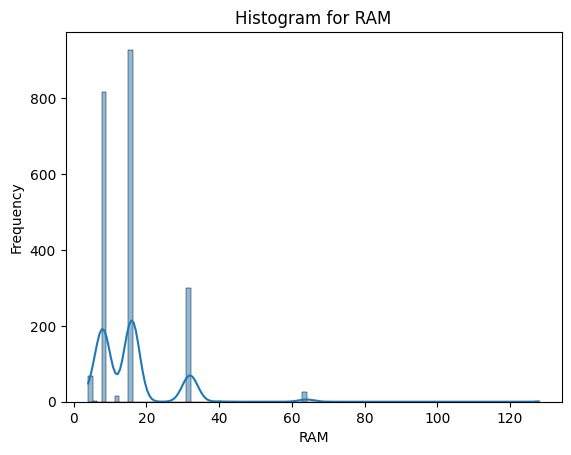

In [575]:
## Histplot for RAM 

sns.histplot(laptopdata['RAM'], kde=True)
plt.xlabel('RAM')
plt.ylabel('Frequency')
plt.title('Histogram for RAM')
plt.show()

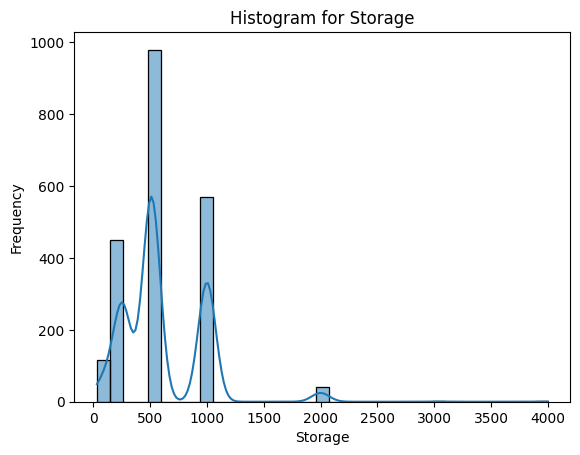

In [576]:
## Histplot for Storage 

sns.histplot(laptopdata['Storage'], kde=True)
plt.xlabel('Storage')
plt.ylabel('Frequency')
plt.title('Histogram for Storage')
plt.show()

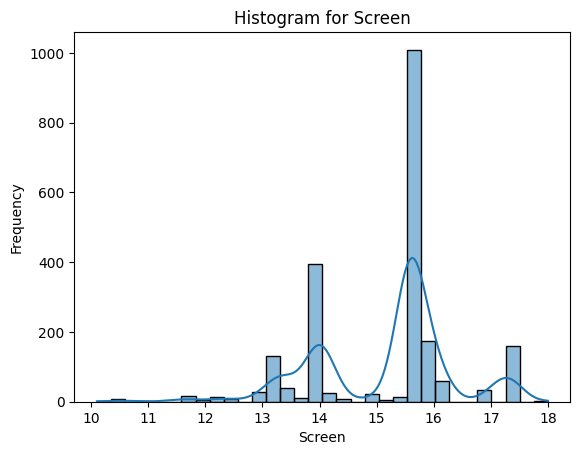

In [577]:
## Histplot for Screen

sns.histplot(laptopdata['Screen'], kde=True)
plt.xlabel('Screen')
plt.ylabel('Frequency')
plt.title('Histogram for Screen')
plt.show()

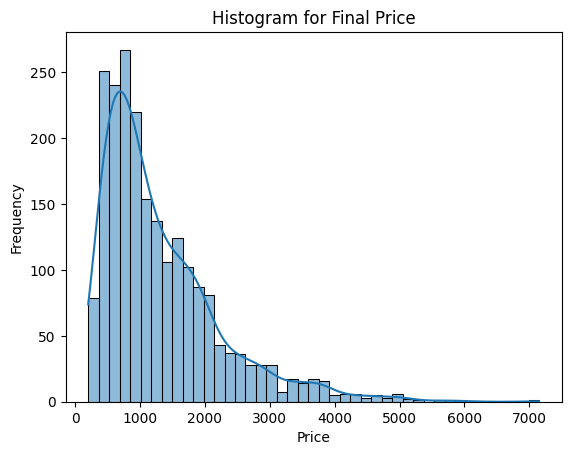

In [578]:
## Histplot for Final_Price 

sns.histplot(laptopdata['Final_Price'], kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram for Final Price')
plt.show()

It looks like Screen, Price, Storage and RAM have outliers.

<Axes: ylabel='Final_Price'>

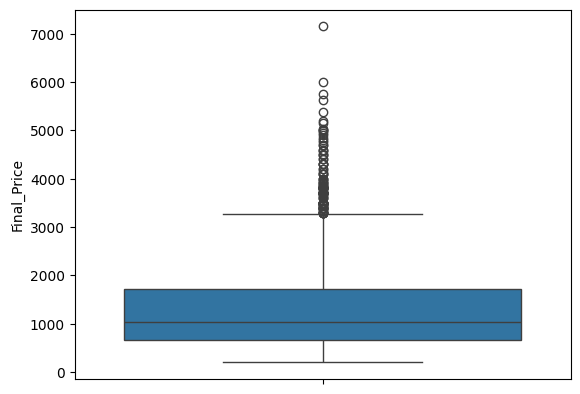

In [579]:
sns.boxplot(y = laptopdata["Final_Price"])

<Axes: ylabel='Screen'>

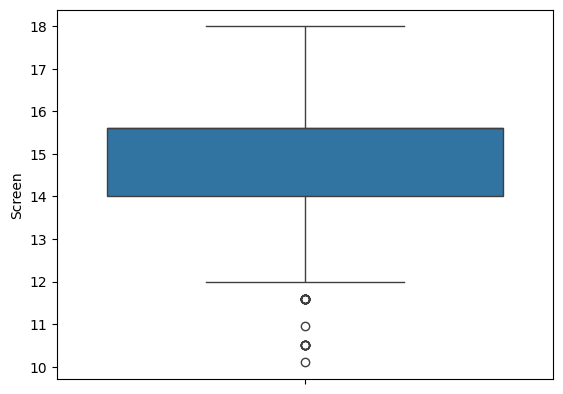

In [580]:
sns.boxplot(y = laptopdata["Screen"])

<Axes: ylabel='Storage'>

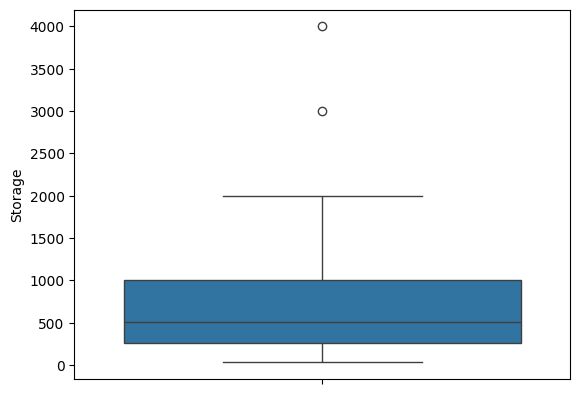

In [581]:
sns.boxplot(y = laptopdata["Storage"])

<Axes: ylabel='RAM'>

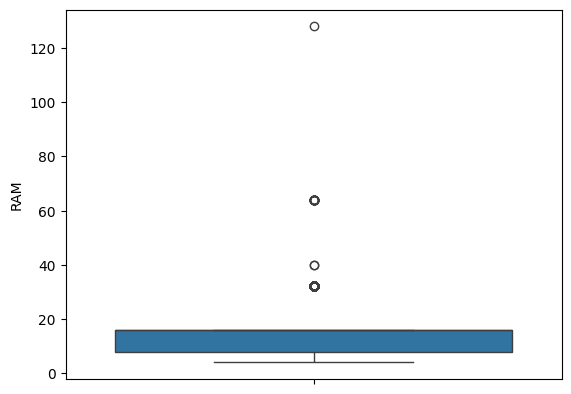

In [582]:
sns.boxplot(y = laptopdata["RAM"])

In [583]:
## treating outliers for screen

laptopdata['Screen'][laptopdata['Screen'] < 12] = 12

<Axes: ylabel='Screen'>

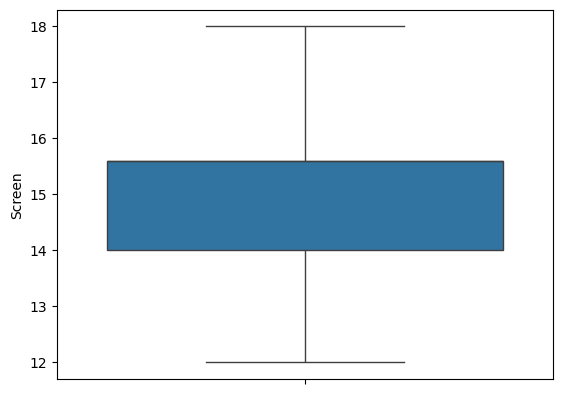

In [584]:
sns.boxplot(y = laptopdata["Screen"])

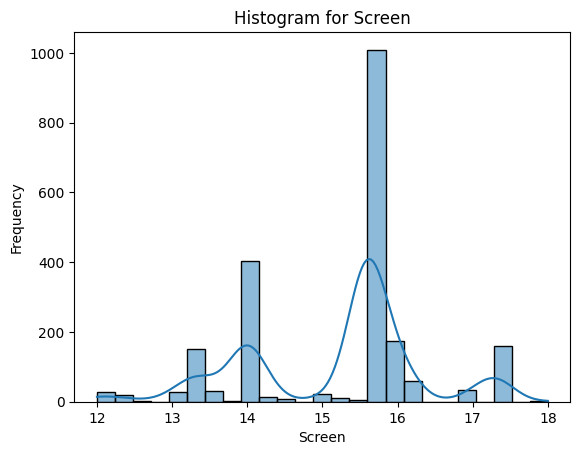

In [585]:
## Histplot for Screen 

sns.histplot(laptopdata['Screen'], kde=True)
plt.xlabel('Screen')
plt.ylabel('Frequency')
plt.title('Histogram for Screen')
plt.show()

In [586]:
## treating outliers for storage

laptopdata['Storage'][laptopdata['Storage'] > 2500] = 2000

<Axes: ylabel='Storage'>

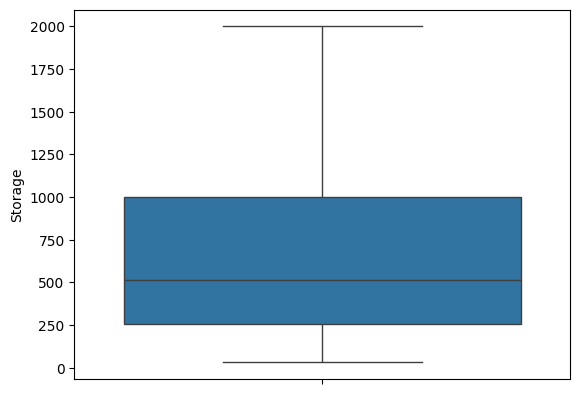

In [587]:
sns.boxplot(y = laptopdata["Storage"])

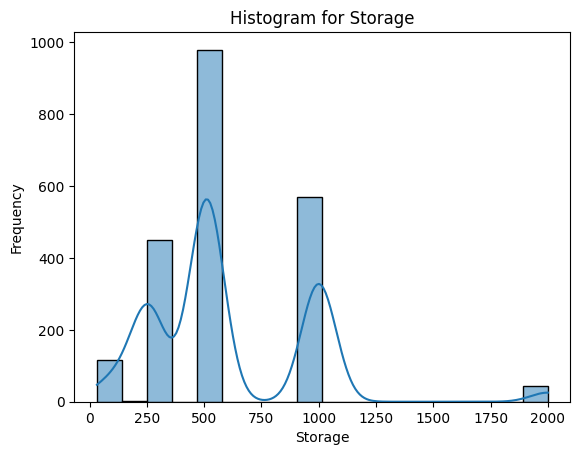

In [588]:
## Histplot for Storage 

sns.histplot(laptopdata['Storage'], kde=True)
plt.xlabel('Storage')
plt.ylabel('Frequency')
plt.title('Histogram for Storage')
plt.show()

In [589]:
laptopdata['Final_Price'][laptopdata['Final_Price'] > 3000] = 2500

<Axes: ylabel='Final_Price'>

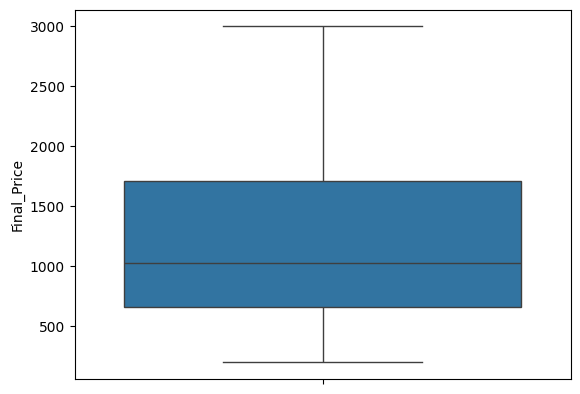

In [590]:
sns.boxplot(y = laptopdata["Final_Price"])

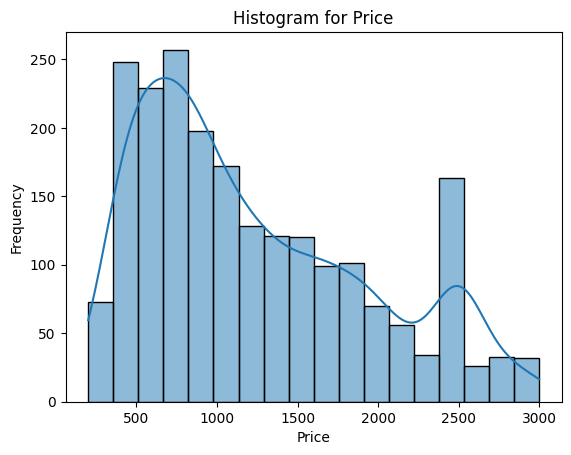

In [591]:
## Histplot for Price 

sns.histplot(laptopdata['Final_Price'], kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram for Price')
plt.show()

In [592]:
laptopdata['RAM'][laptopdata['RAM'] > 20] = 20 

<Axes: ylabel='RAM'>

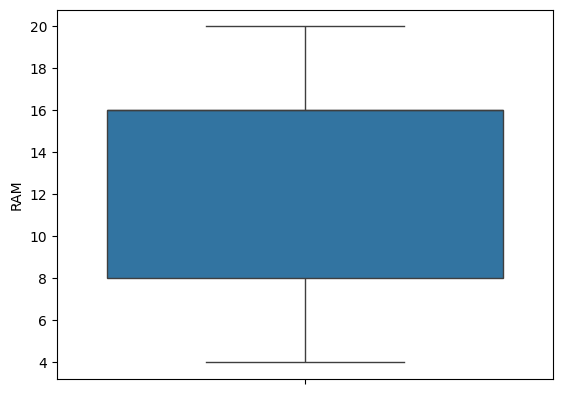

In [593]:
sns.boxplot(y = laptopdata["RAM"])

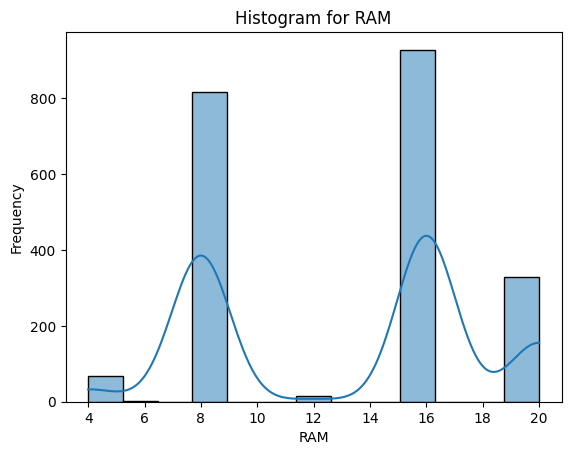

In [594]:
## Histplot for RAM

sns.histplot(laptopdata['RAM'], kde=True)
plt.xlabel('RAM')
plt.ylabel('Frequency')
plt.title('Histogram for RAM')
plt.show()

Hence all the outliers had been treated in numrical columns. Now I will do some data visualization.

## Data Visualization

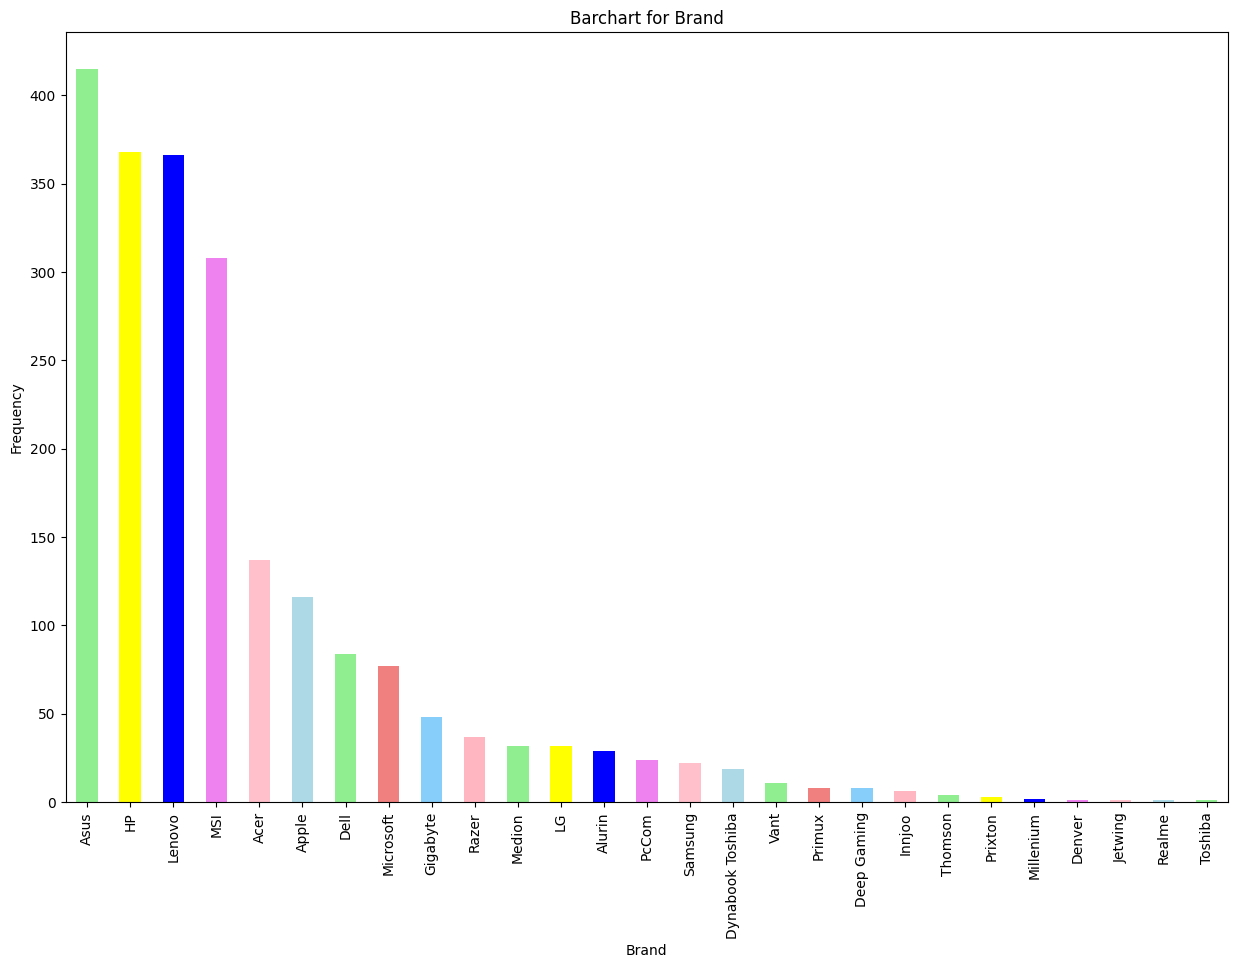

In [595]:

laptopdata['Brand'].value_counts().plot(kind = 'bar',figsize=(15, 10),color=['lightgreen', 'yellow', 'blue', 'violet', 'pink',
                                                        'lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.title('Barchart for Brand')
plt.show()

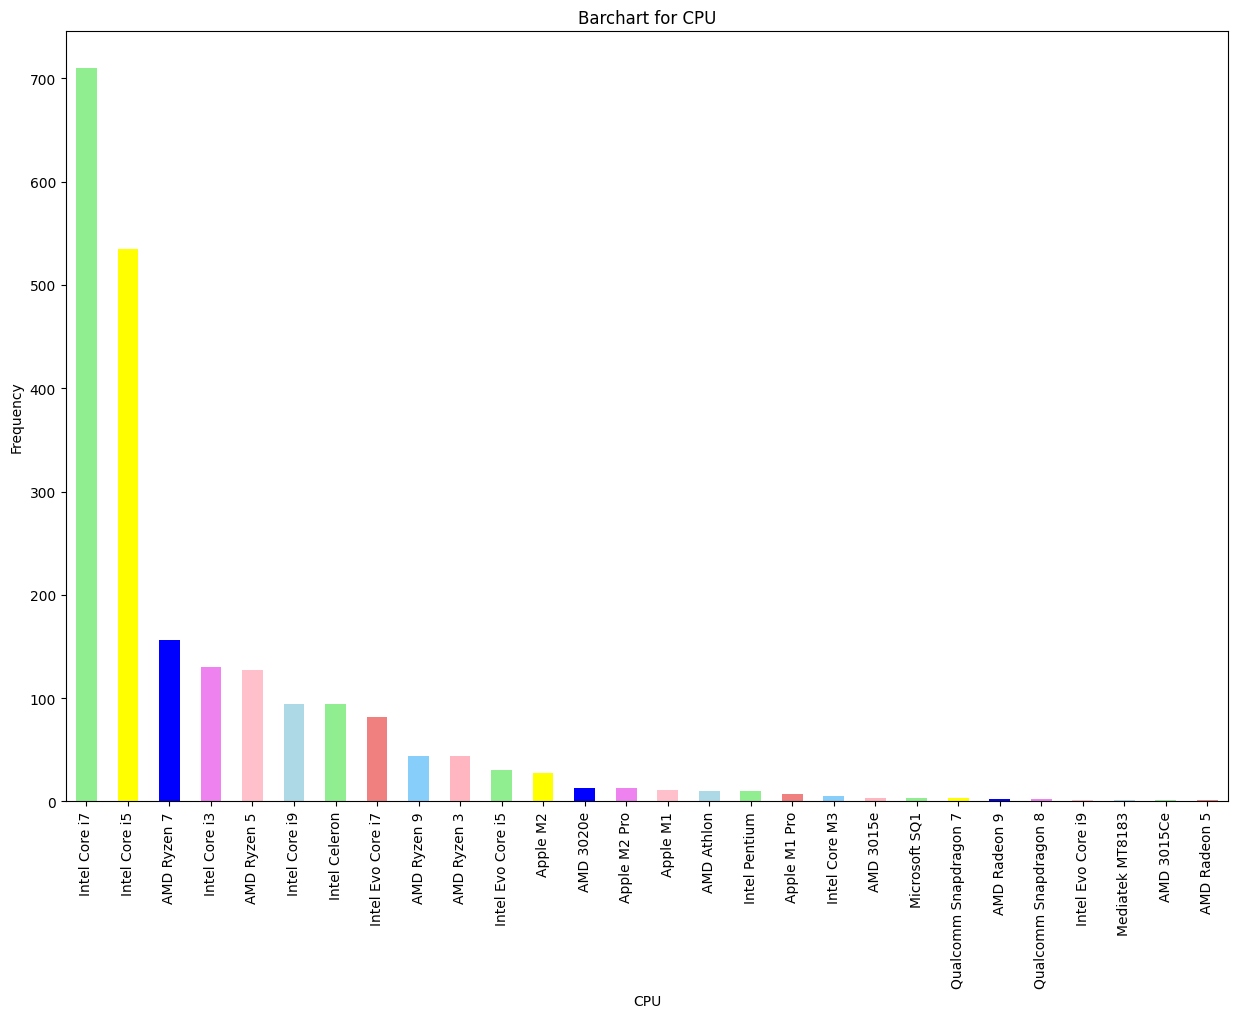

In [596]:
laptopdata['CPU'].value_counts().plot(kind = 'bar',  figsize=(15, 10),color=['lightgreen', 'yellow', 'blue', 'violet', 'pink',
                                                        'lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.xlabel('CPU')
plt.ylabel('Frequency')
plt.title('Barchart for CPU')
plt.show()

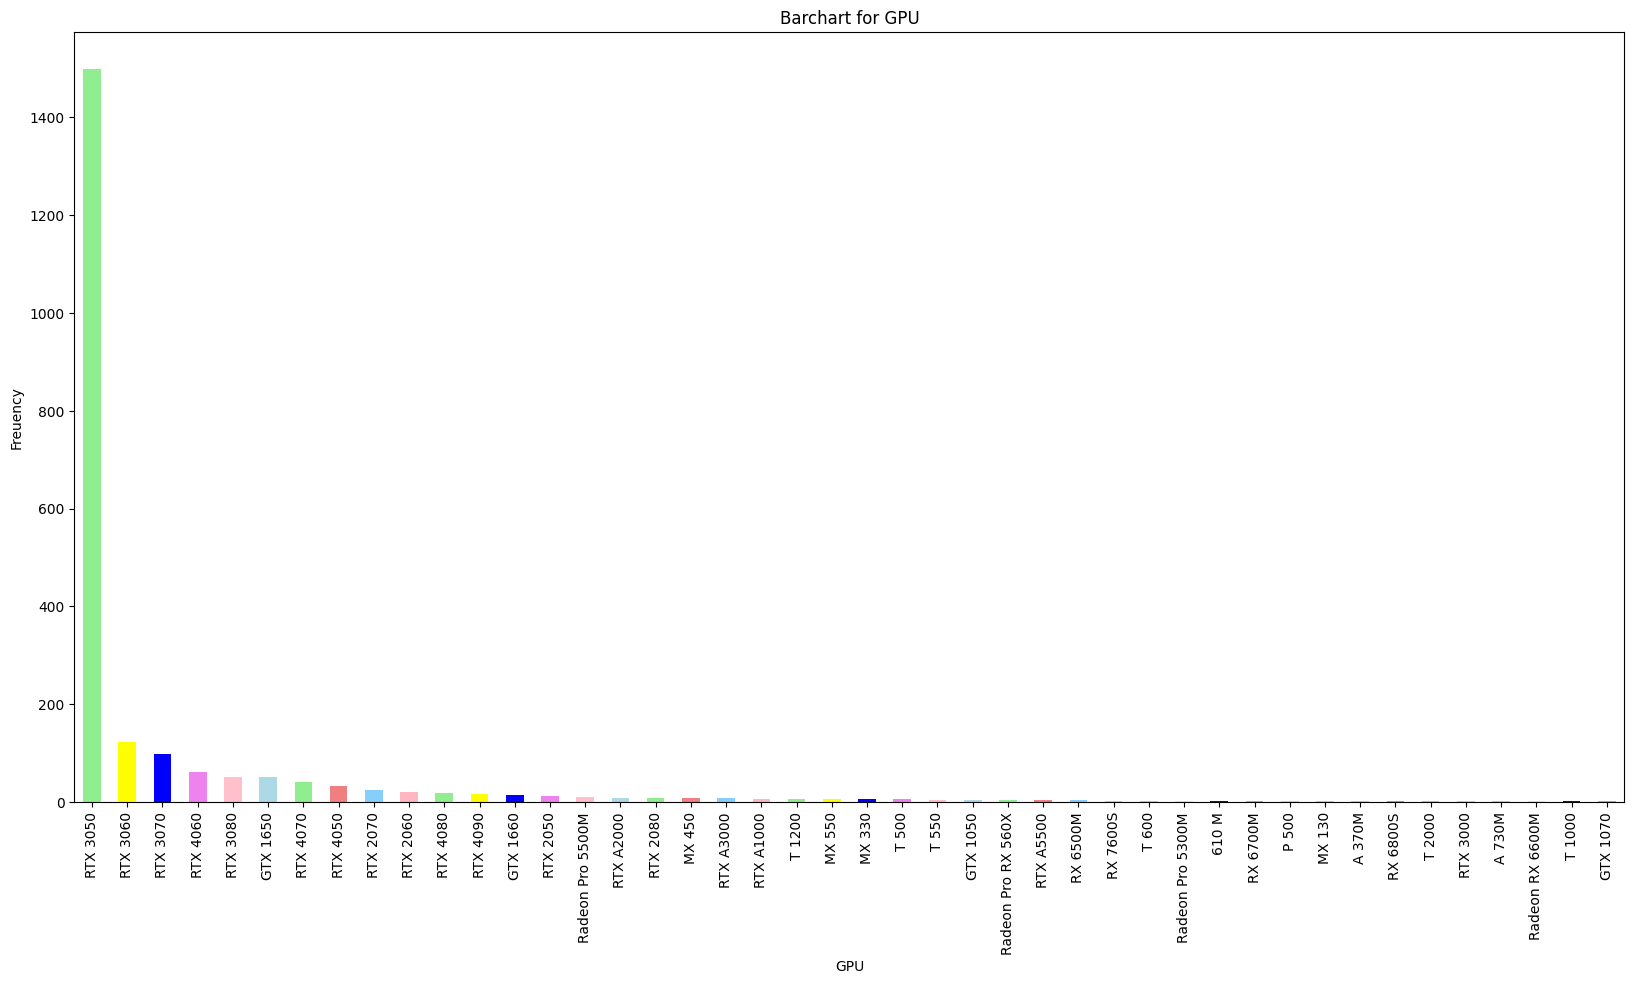

In [597]:
laptopdata['GPU'].value_counts().plot(kind = 'bar', figsize=(20, 10),color=['lightgreen', 'yellow', 'blue', 'violet', 'pink',
                                                                'lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.xlabel('GPU')
plt.ylabel('Freuency')
plt.title('Barchart for GPU')
plt.show()

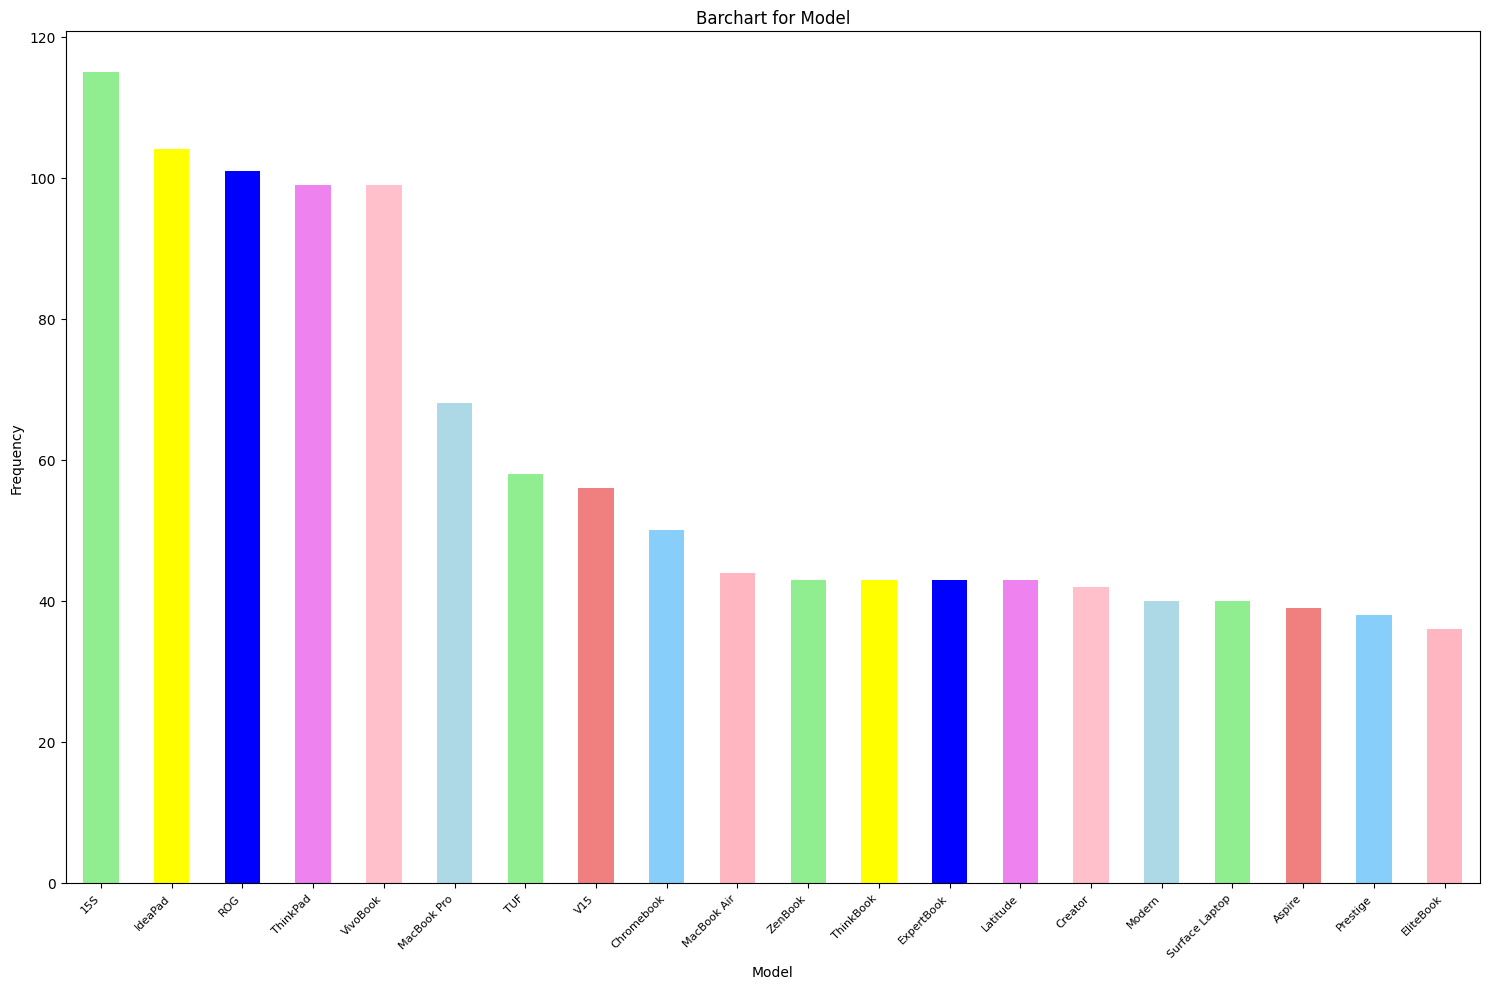

In [598]:
laptopdata['Model'].value_counts().nlargest(20).plot(kind = 'bar', figsize=(15, 10),color=['lightgreen', 'yellow', 'blue', 'violet', 'pink',
                                                                         'lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.xlabel('Model')
plt.ylabel('Frequency')
plt.title('Barchart for Model')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotating x-axis labels for better readability
plt.tight_layout() 
plt.show()

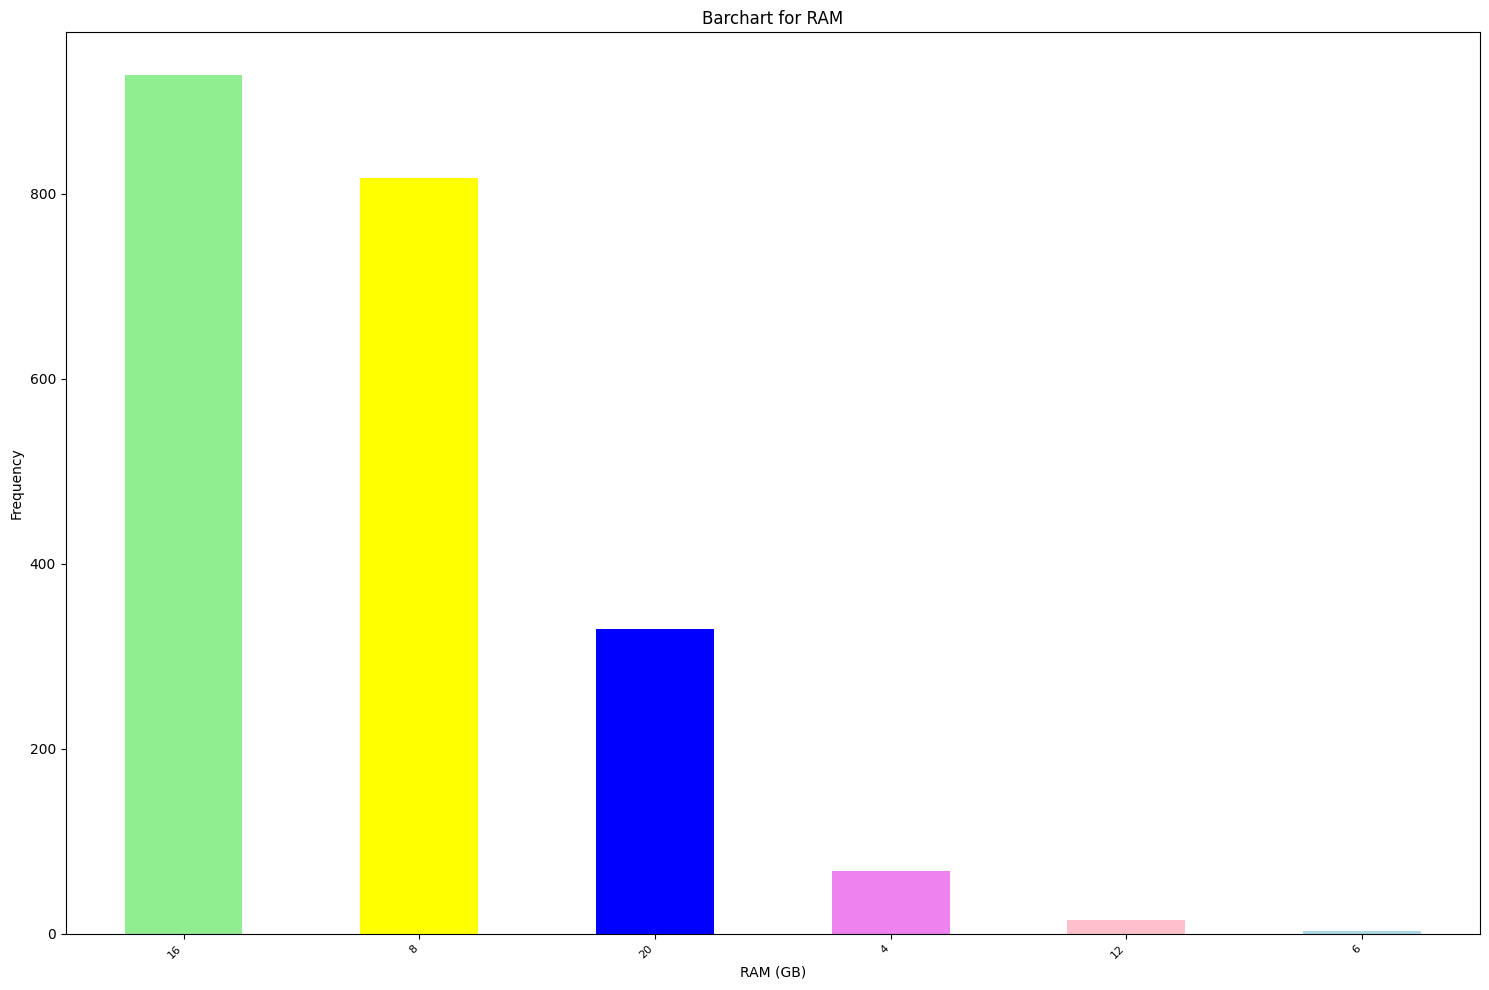

In [599]:
laptopdata['RAM'].value_counts().nlargest(20).plot(kind = 'bar', figsize=(15, 10),color=['lightgreen', 'yellow', 'blue', 'violet', 'pink',
                                                                         'lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.xlabel('RAM (GB)')
plt.ylabel('Frequency')
plt.title('Barchart for RAM')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotating x-axis labels for better readability
plt.tight_layout() 
plt.show()

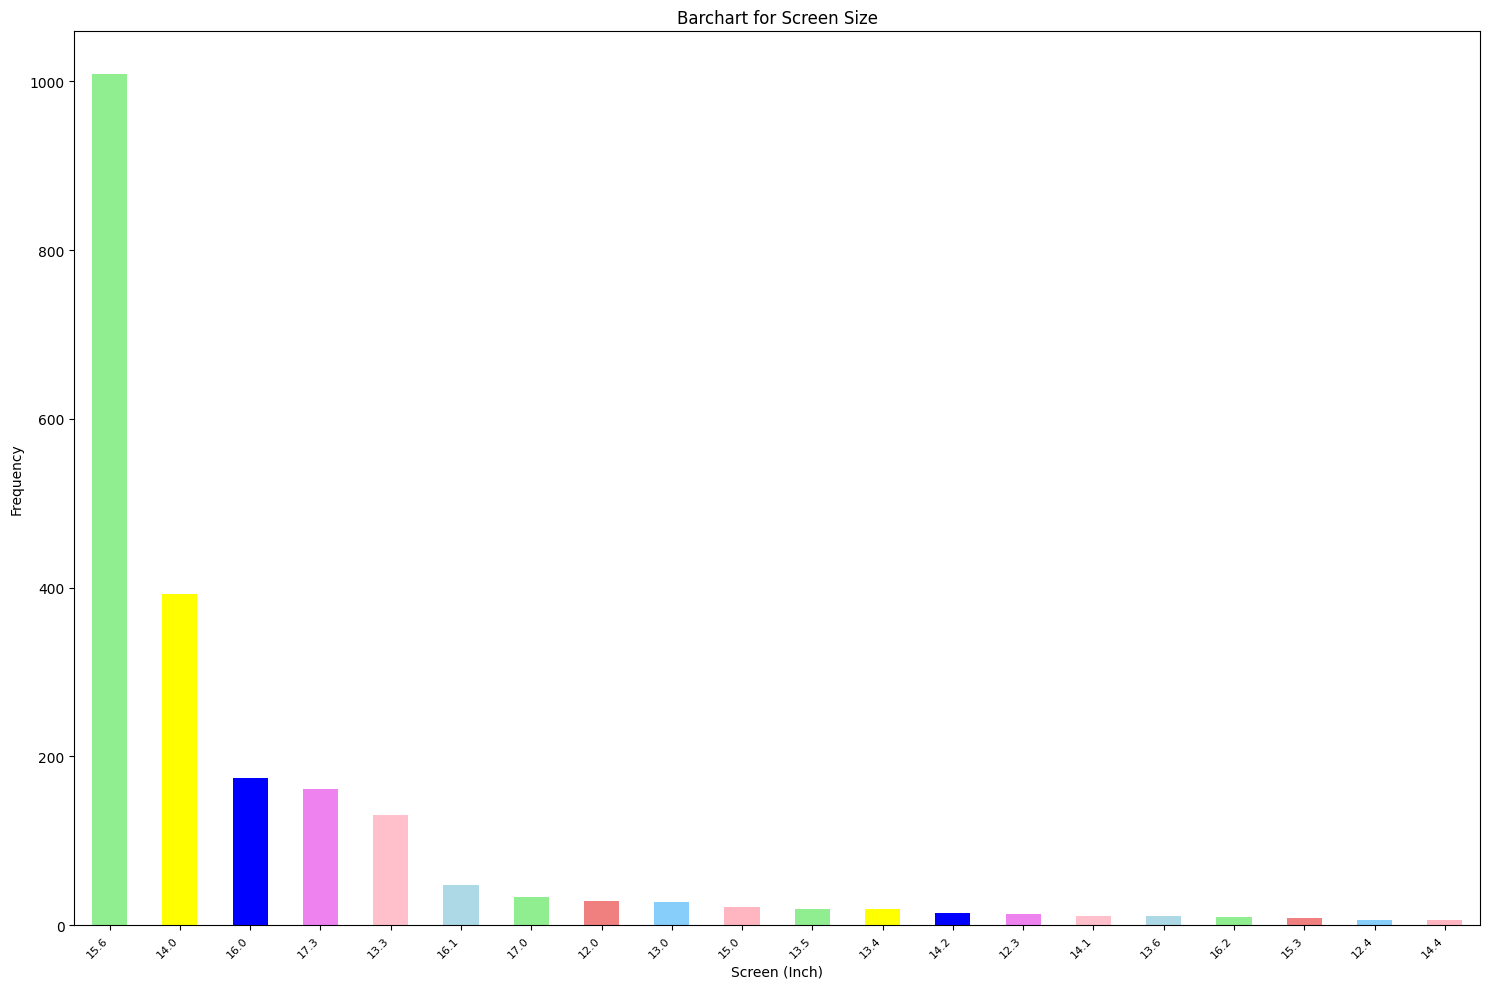

In [600]:
laptopdata['Screen'].value_counts().nlargest(20).plot(kind = 'bar', figsize=(15, 10),color=['lightgreen', 'yellow', 'blue', 'violet', 'pink',
                                                                         'lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.xlabel('Screen (Inch)')
plt.ylabel('Frequency')
plt.title('Barchart for Screen Size')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotating x-axis labels for better readability
plt.tight_layout() 
plt.show()

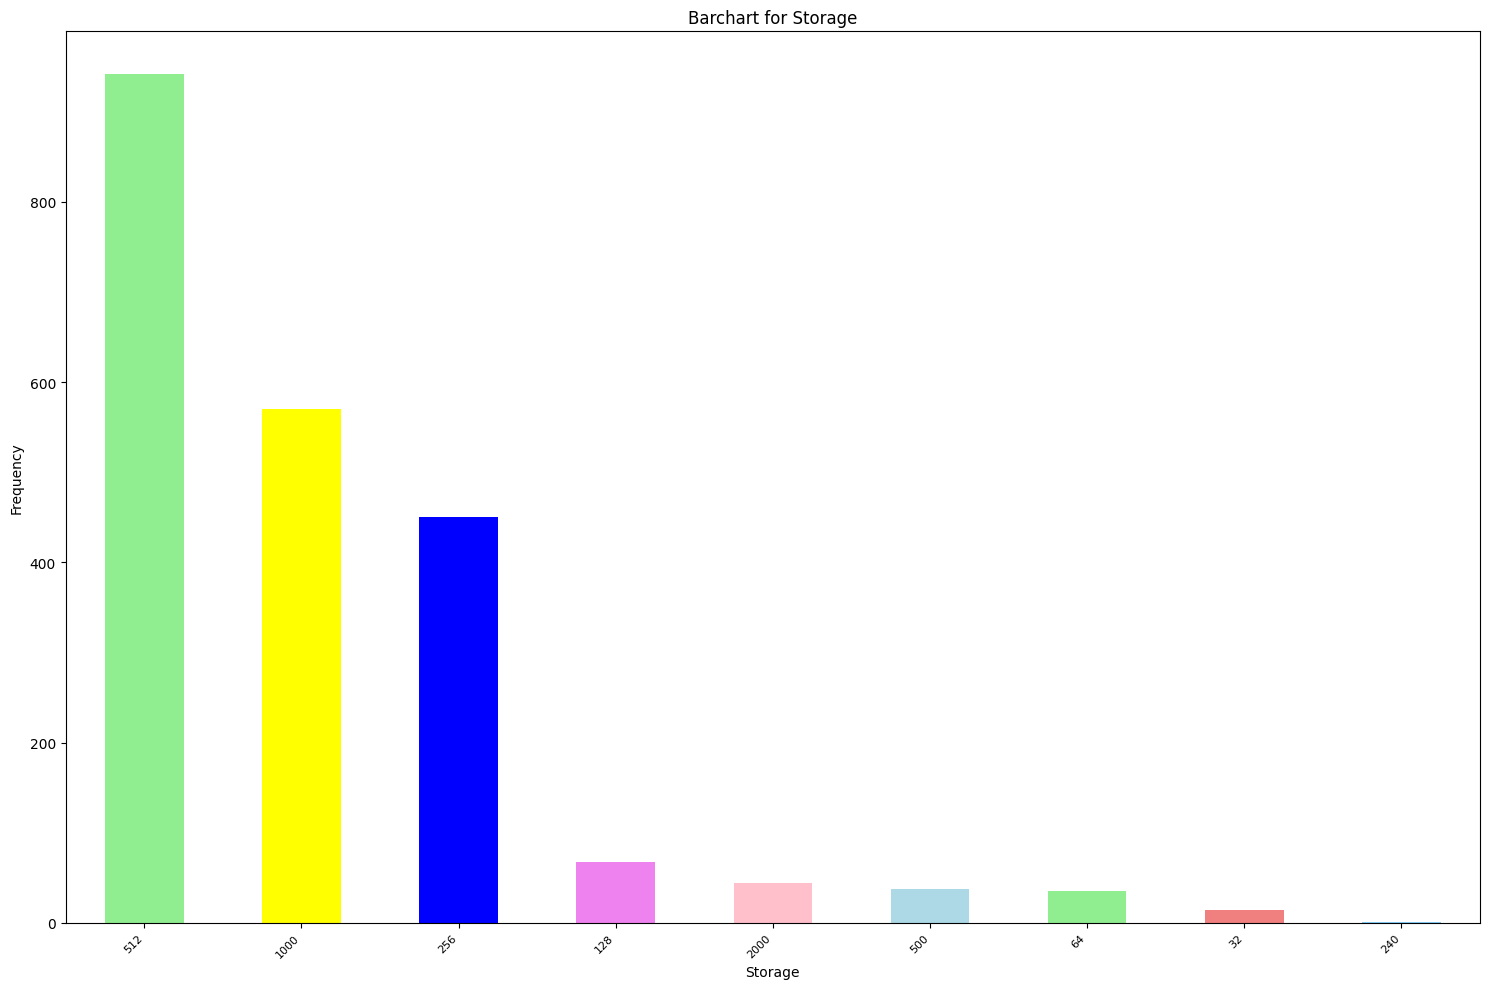

In [601]:
laptopdata['Storage'].value_counts().nlargest(20).plot(kind = 'bar', figsize=(15, 10),color=['lightgreen', 'yellow', 'blue', 'violet', 'pink',
                                                                         'lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.xlabel('Storage')
plt.ylabel('Frequency')
plt.title('Barchart for Storage')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotating x-axis labels for better readability
plt.tight_layout() 
plt.show()

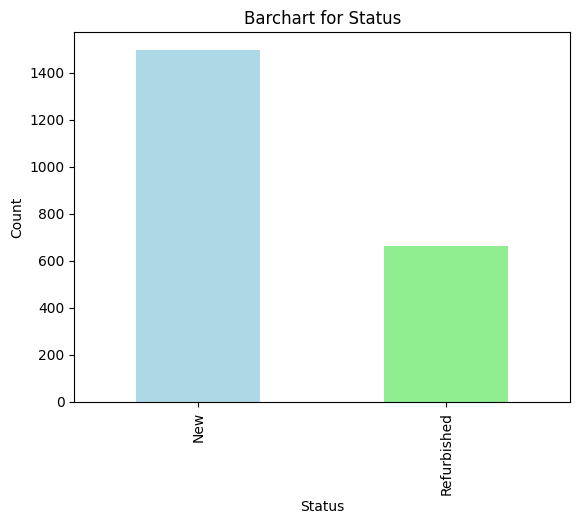

In [602]:
colors = ['lightblue', 'lightgreen']

laptopdata['Status'].value_counts().plot(kind = 'bar', color= colors)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Barchart for Status')
plt.show()

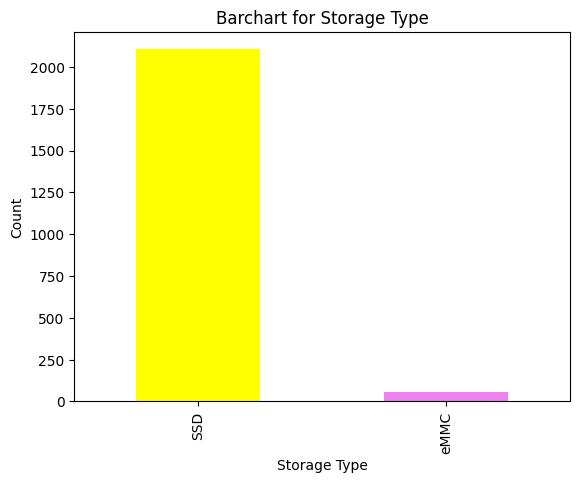

In [603]:
laptopdata['Storage_Type'].value_counts().plot(kind = 'bar', color = ['yellow', 'violet'])
plt.xlabel('Storage Type')
plt.ylabel('Count')
plt.title('Barchart for Storage Type')
plt.show()

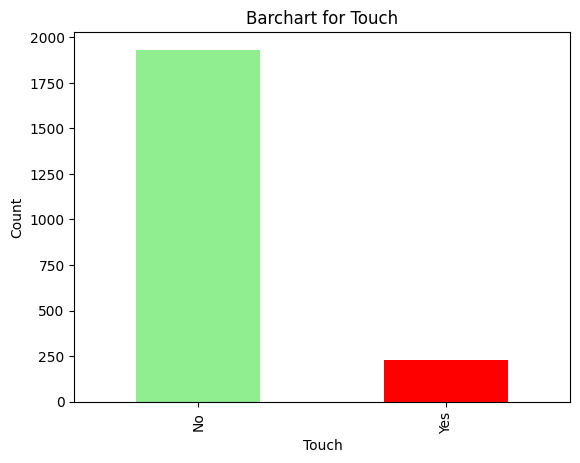

In [604]:
laptopdata['Touch'].value_counts().plot(kind = 'bar', color = ['lightgreen', 'red'])
plt.xlabel('Touch')
plt.ylabel('Count')
plt.title('Barchart for Touch')
plt.show()

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

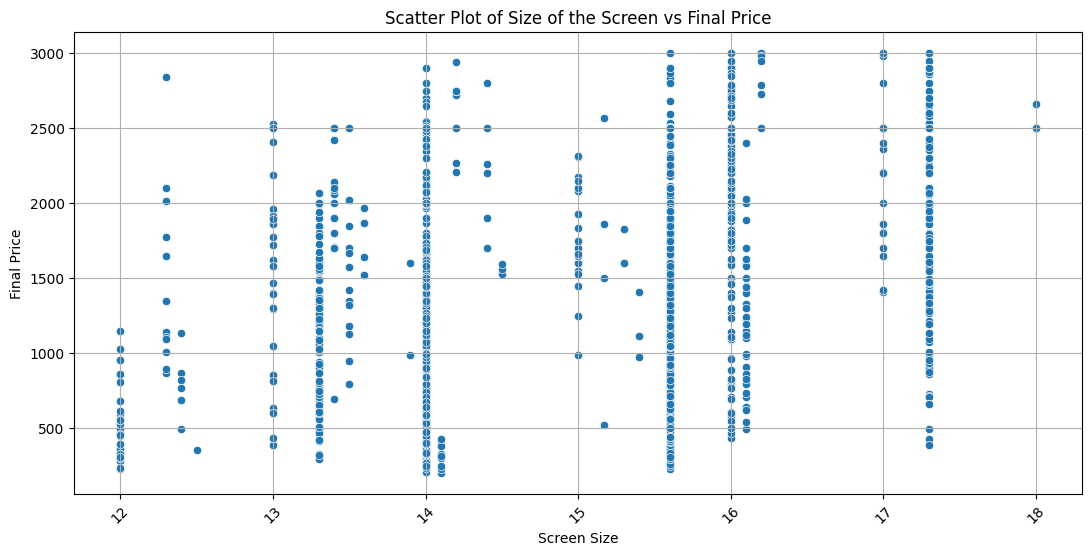

In [605]:
## scatterplot between two numerical column

plt.figure(figsize=(13, 6))
sns.scatterplot(data= laptopdata, x='Screen', y='Final_Price')
plt.title('Scatter Plot of Size of the Screen vs Final Price')
plt.xlabel('Screen Size')
plt.ylabel('Final Price')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

In [606]:
# import matplotlib.pyplot as plt

# # Create scatter plot using Matplotlib
# plt.figure(figsize=(10, 6))
# plt.scatter(laptopdata['Screen'], laptopdata['Final_Price'])

# # Set plot labels and title
# plt.xlabel('Screen(Inches)')
# plt.ylabel('Final Price')
# plt.title('Scatter Plot of Final Price vs Screen Size')

# # Show plot
# plt.show()

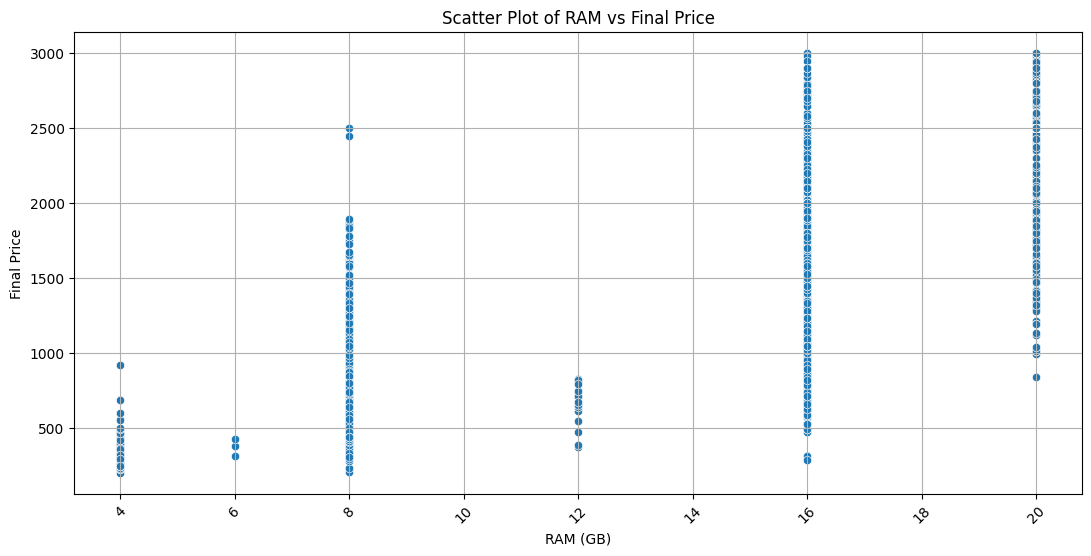

In [607]:
plt.figure(figsize=(13, 6))
sns.scatterplot(data= laptopdata, x='RAM', y='Final_Price')
plt.title('Scatter Plot of RAM vs Final Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Final Price')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

In [608]:
# import matplotlib.pyplot as plt

# # Create scatter plot using Matplotlib
# plt.figure(figsize=(10, 6))
# plt.scatter(laptopdata['RAM'], laptopdata['Final_Price'])

# # Set plot labels and title
# plt.xlabel('RAM (GB)')
# plt.ylabel('Final Price')
# plt.title('Scatter Plot of Final Price vs RAM')

# # Show plot
# plt.show()

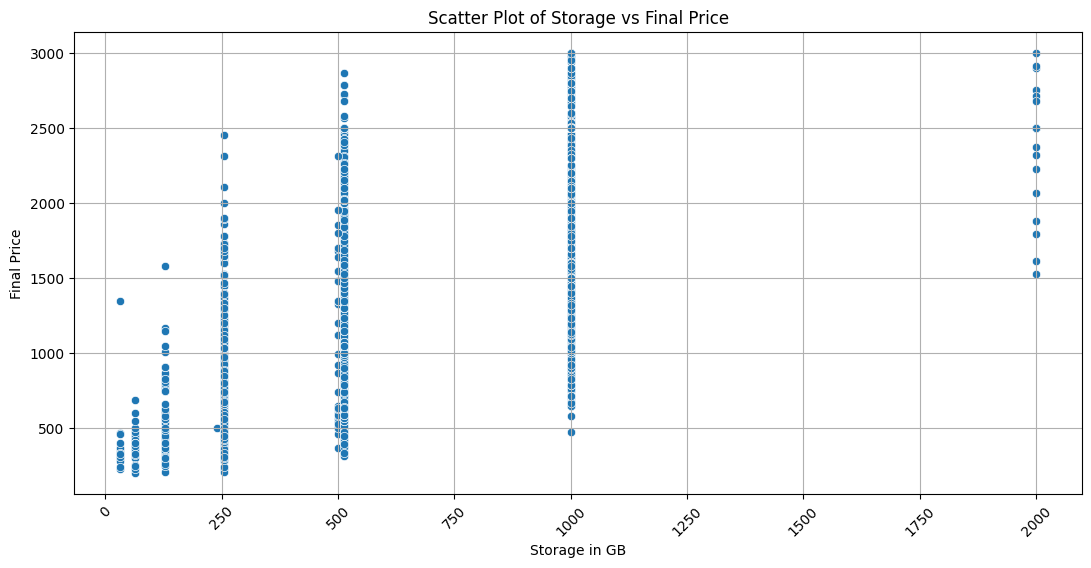

In [609]:
plt.figure(figsize=(13, 6))
sns.scatterplot(data= laptopdata, x='Storage', y='Final_Price')
plt.title('Scatter Plot of Storage vs Final Price')
plt.xlabel('Storage in GB')
plt.ylabel('Final Price')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

In [610]:
# import matplotlib.pyplot as plt

# # Create scatter plot using Matplotlib
# plt.figure(figsize=(10, 6))
# plt.scatter(laptopdata['Storage'], laptopdata['Final_Price'])

# # Set plot labels and title
# plt.xlabel('Storage')
# plt.ylabel('Final Price')
# plt.title('Scatter Plot of Final Price vs Storage')

# # Show plot
# plt.show()

In [611]:
# plt.figure(figsize=(13, 6))
# sns.scatterplot(data= laptopdata, x='CPU', y='Final_Price')
# plt.title('Scatter Plot of CPU vs Final Price')
# plt.xlabel('CPU')
# plt.ylabel('Final Price')
# plt.xticks(rotation=45) 
# plt.grid(True)
# plt.show()

In [612]:
# plt.figure(figsize=(13, 6))
# sns.scatterplot(data= laptopdata, x='GPU', y='Final_Price')
# plt.title('Scatter Plot of GPU vs Final Price')
# plt.xlabel('GPU')
# plt.ylabel('Final Price')
# plt.xticks(rotation=45) 
# plt.grid(True)
# plt.show()

In [613]:
# plt.figure(figsize=(13, 6))
# sns.scatterplot(data= laptopdata, x='Brand', y='Final_Price')
# plt.title('Scatter Plot of Brand vs Final Price')
# plt.xlabel('Brand')
# plt.ylabel('Final Price')
# plt.xticks(rotation=45) 
# plt.grid(True)
# plt.show()

In [614]:
laptopdata.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage_Type', 'GPU', 'Screen', 'Touch', 'Final_Price'],
      dtype='object')

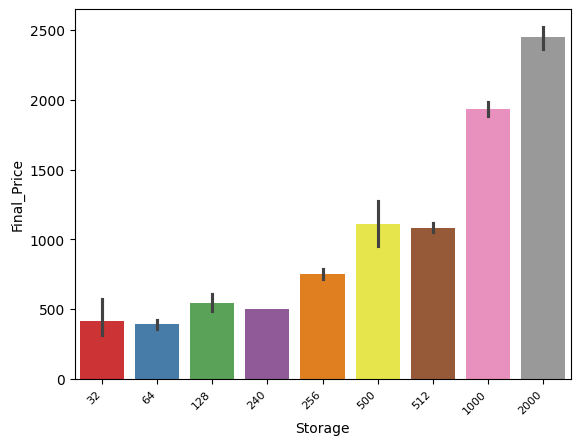

In [615]:
sns.barplot(data= laptopdata, x= 'Storage', y='Final_Price', palette='Set1')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotating x-axis labels for better readability
plt.show()

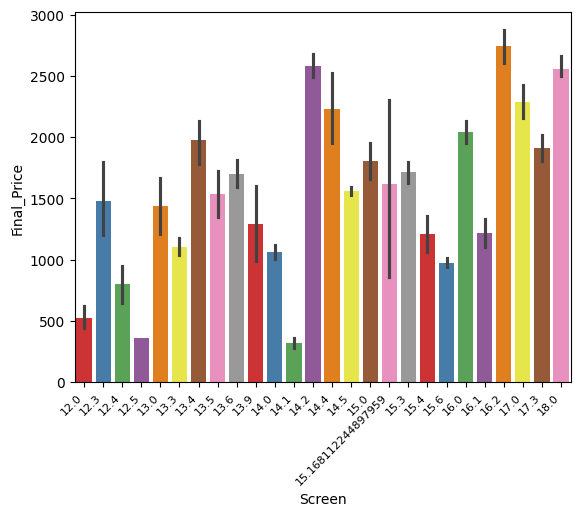

In [616]:
## barplot between two numerical columns
sns.barplot(data= laptopdata, x= 'Screen', y='Final_Price', palette='Set1')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotating x-axis labels for better readability
plt.show()

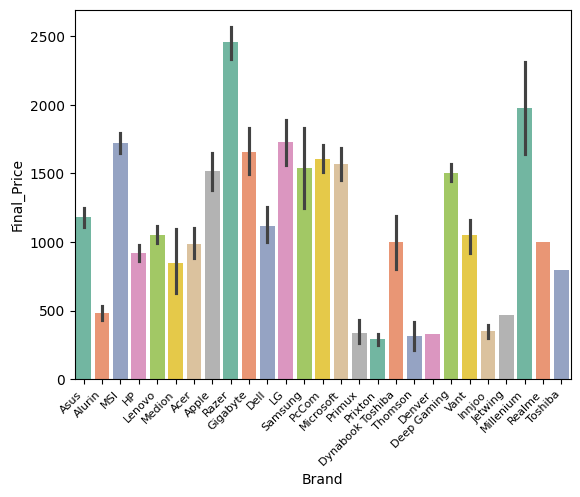

In [617]:
sns.barplot(data= laptopdata , x = 'Brand', y= 'Final_Price', palette='Set2')
plt.xticks(rotation= 45, ha='right', fontsize=8)
plt.show()

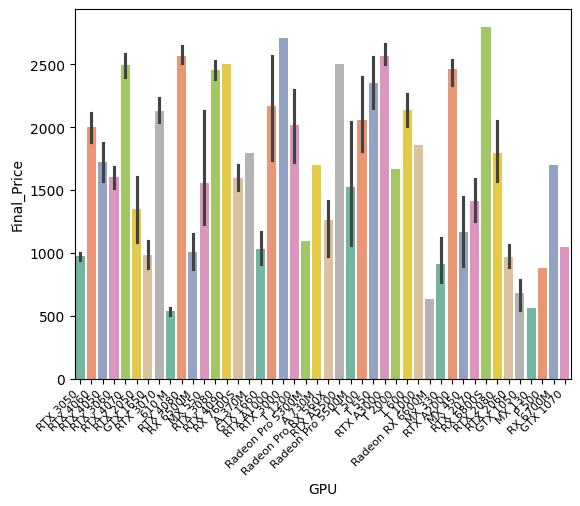

In [618]:
sns.barplot(data= laptopdata , x = 'GPU', y= 'Final_Price', palette='Set2')
plt.xticks(rotation= 45, ha='right', fontsize=8)
plt.show()

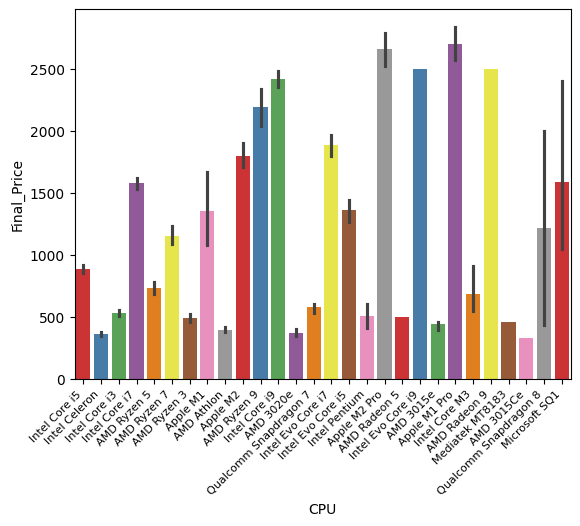

In [619]:
sns.barplot(data= laptopdata , x = 'CPU', y= 'Final_Price', palette='Set1')
plt.xticks(rotation= 45, ha='right', fontsize=8)
plt.show()

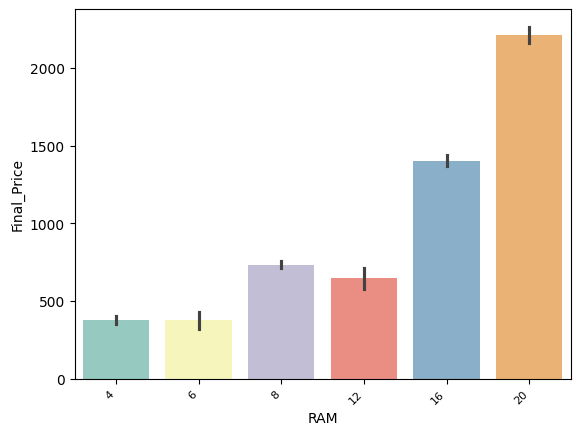

In [620]:
sns.barplot(data= laptopdata , x = 'RAM', y= 'Final_Price', palette='Set3')
plt.xticks(rotation= 45, ha='right', fontsize=8)
plt.show()

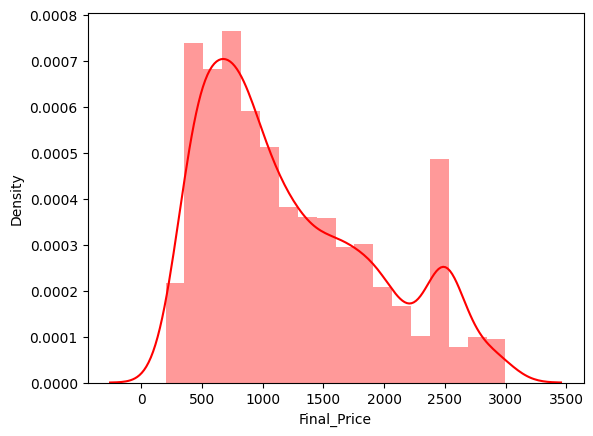

In [621]:
# plt.figure(figsize=(8,6))
sns.distplot(laptopdata['Final_Price'],color='red')
plt.show()

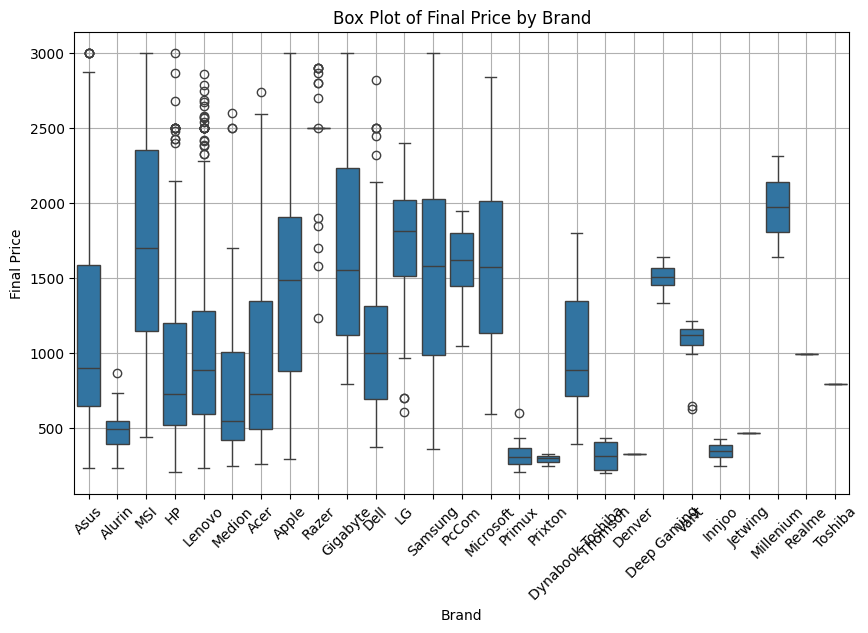

In [622]:
## boxplot between Categorical columns and continous column Final_Price

cat_column = laptopdata['Brand']

plt.figure(figsize=(10, 6))
sns.boxplot(data= laptopdata, x=cat_column, y= laptopdata['Final_Price'])
plt.title('Box Plot of Final Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Final Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

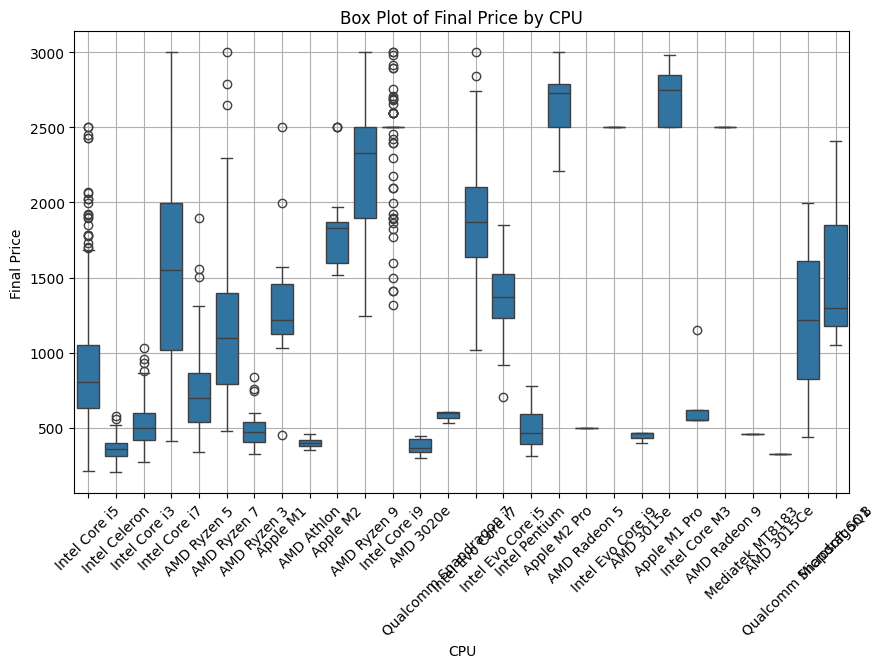

In [623]:
## boxplot between Categorical columns and continous column Final_Price

cat_column = laptopdata['CPU']

plt.figure(figsize=(10, 6))
sns.boxplot(data= laptopdata, x=cat_column, y= laptopdata['Final_Price'])
plt.title('Box Plot of Final Price by CPU')
plt.xlabel('CPU')
plt.ylabel('Final Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

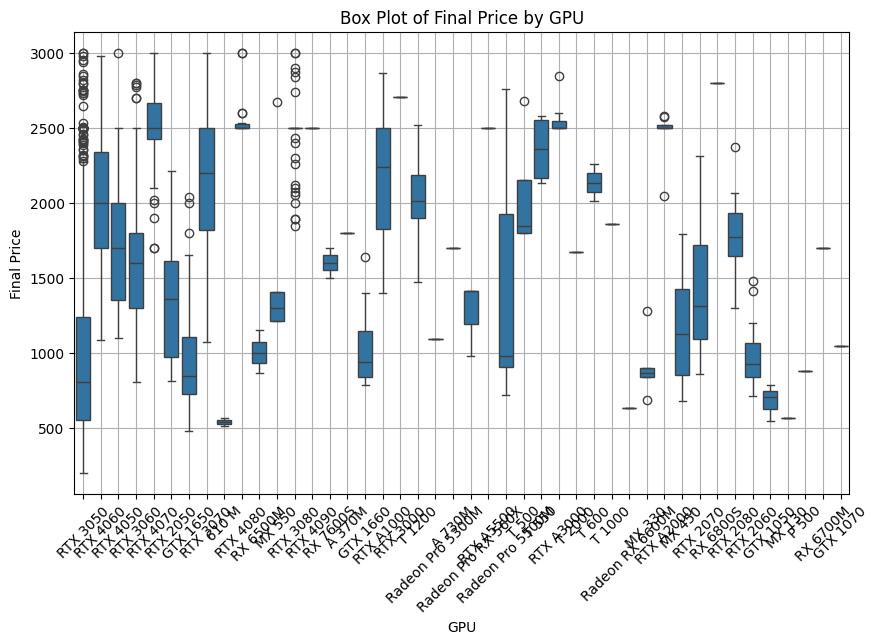

In [624]:
## boxplot between Categorical columns and continous column Final_Price

cat_column = laptopdata['GPU']

plt.figure(figsize=(10, 6))
sns.boxplot(data= laptopdata, x=cat_column, y= laptopdata['Final_Price'])
plt.title('Box Plot of Final Price by GPU')
plt.xlabel('GPU')
plt.ylabel('Final Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [625]:
# ## boxplot between two continous columns
# cat_column = laptopdata['Storage']

# plt.figure(figsize=(10, 6))
# sns.boxplot(data= laptopdata, x=cat_column, y= laptopdata['Final_Price'])
# plt.title('Box Plot of Final Price by Storage')
# plt.xlabel('Storage in GB')
# plt.ylabel('Final Price')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.grid(True)
# plt.show()

In [626]:
# ## boxplot between Categorical columns and continous column Final_Price

# cat_column = laptopdata['RAM']

# plt.figure(figsize=(10, 6))
# sns.boxplot(data= laptopdata, x=cat_column, y= laptopdata['Final_Price'])
# plt.title('Box Plot of Final Price by RAM')
# plt.xlabel('RAM in GB')
# plt.ylabel('Final Price')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.grid(True)
# plt.show()

In [627]:
laptopdata.describe(include='all')

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage_Type,GPU,Screen,Touch,Final_Price
count,2160,2160,2160,2160,2160,2160.000000,2160.000000,2160,2160,2160.000000,2160,2160.000000
unique,2160,2,27,121,28,NaN,NaN,2,44,NaN,2,NaN
top,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,15S,Intel Core i7,NaN,NaN,SSD,RTX 3050,NaN,No,NaN
freq,1,1498,415,115,710,NaN,NaN,2104,1500,NaN,1933,NaN
mean,NaN,NaN,NaN,NaN,NaN,13.163889,595.142593,NaN,NaN,15.177302,NaN,1233.857032
std,NaN,NaN,NaN,NaN,NaN,4.836846,352.279225,NaN,NaN,1.173164,NaN,707.186530
min,NaN,NaN,NaN,NaN,NaN,4.000000,32.000000,NaN,NaN,12.000000,NaN,201.050000
25%,NaN,NaN,NaN,NaN,NaN,8.000000,256.000000,NaN,NaN,14.000000,NaN,661.082500
50%,NaN,NaN,NaN,NaN,NaN,16.000000,512.000000,NaN,NaN,15.600000,NaN,1031.945000
75%,NaN,NaN,NaN,NaN,NaN,16.000000,1000.000000,NaN,NaN,15.600000,NaN,1708.970000


## Statistical feature selection(Continous Vs Continous) Pearson Correlation

In [628]:
laptopdata.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage_Type', 'GPU', 'Screen', 'Touch', 'Final_Price'],
      dtype='object')

In [629]:
# Calculating correlation matrix
ContinuousCols= ['Final_Price', 'Screen', 'Storage', 'RAM']

# Creating the correlation matrix
CorrelationData= laptopdata[ContinuousCols].corr()
CorrelationData

,Final_Price,Screen,Storage,RAM
Final_Price,1.000000,0.242664,0.680362,0.719703
Screen,0.242664,1.000000,0.402693,0.327891
Storage,0.680362,0.402693,1.000000,0.706364
RAM,0.719703,0.327891,0.706364,1.000000


In [630]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Final_Price'][abs(CorrelationData['Final_Price']) > 0.5 ]

Final_Price    1.000000
Storage        0.680362
RAM            0.719703
Name: Final_Price, dtype: float64

Hence the final selected continous columns are **Final_Price**, **Storage** and **RAM**

### Statistical Feature Selection (Categorical VS Continous) Using ANOVA

In [631]:
laptopdata.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage_Type', 'GPU', 'Screen', 'Touch', 'Final_Price'],
      dtype='object')

In [632]:
def Func_ANOVA(input_data, categoricalpredictlist, TargetVariable):
    from scipy.stats import f_oneway
    
    ## creating empty list for the final selected predictors 
    Selected_predictors = []
    
    for predictor in categoricalpredictlist:
        categorygrplist = input_data.groupby(predictor)[TargetVariable].apply(list)
        Anova_results = f_oneway(*categorygrplist)
        
         
        if (Anova_results[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, ' the P-Value:', Anova_results[1])
            Selected_predictors.append(predictor)
        else:
            
            print(predictor, 'is NOT correlated with', TargetVariable, ' the P-Value:', Anova_results[1])
    
    return(Selected_predictors)

In [633]:
categoricalpredictorlist = ['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'Storage_Type', 'GPU', 'Touch']
Func_ANOVA(input_data  = laptopdata,
          categoricalpredictlist  = categoricalpredictorlist,
          TargetVariable = 'Final_Price')

Laptop is NOT correlated with Final_Price  the P-Value: nan
Status is NOT correlated with Final_Price  the P-Value: 0.9033766680007649
Brand is correlated with Final_Price  the P-Value: 1.5907823927541507e-114
Model is correlated with Final_Price  the P-Value: 0.0
CPU is correlated with Final_Price  the P-Value: 0.0
Storage_Type is correlated with Final_Price  the P-Value: 5.5358499254576325e-19
GPU is correlated with Final_Price  the P-Value: 1.3981346401486075e-255
Touch is correlated with Final_Price  the P-Value: 5.544311743271931e-18


['Brand', 'Model', 'CPU', 'Storage_Type', 'GPU', 'Touch']

Our final selected categorical columns are **Brand**, **Model**, **CPU**, **GPU**, **Touch**, **Storage_Type**

## Exploratory Data Analysis

In [634]:
## Performing Label Encoding for the Categorical columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

laptopdata['Laptop'] = le.fit_transform(laptopdata['Laptop'])
laptopdata['Status'] = le.fit_transform(laptopdata['Status'])
laptopdata['Brand'] = le.fit_transform(laptopdata['Brand'])
laptopdata['Model'] = le.fit_transform(laptopdata['Model'])
laptopdata['Storage_Type'] = le.fit_transform(laptopdata['Storage_Type'])
laptopdata['CPU'] = le.fit_transform(laptopdata['CPU'])
laptopdata['GPU'] = le.fit_transform(laptopdata['GPU'])
laptopdata['Touch'] = le.fit_transform(laptopdata['Touch'])

laptopdata.head(10)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage_Type,GPU,Screen,Touch,Final_Price
0,39,0,3,42,17,8,512,0,17,15.6,0,1009.00
1,487,0,1,54,14,8,256,0,17,15.6,0,299.00
2,33,0,3,42,16,8,256,0,17,15.6,0,789.00
3,1736,0,14,58,18,16,1000,0,17,15.6,0,1199.00
4,942,0,9,4,17,16,512,0,17,15.6,0,669.01
5,1676,0,14,30,18,20,1000,0,22,17.3,0,1699.00
6,1538,0,13,102,7,8,256,0,17,14.0,0,909.00
7,239,0,3,113,18,8,512,0,17,15.6,0,809.01
8,1945,0,15,15,17,8,256,0,17,15.6,0,519.00
9,1194,0,9,112,18,16,512,0,17,16.1,0,1149.00


In [635]:
laptopdata.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage_Type', 'GPU', 'Screen', 'Touch', 'Final_Price'],
      dtype='object')

In [636]:
# Printing sample rows
laptopdata.head(20)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage_Type,GPU,Screen,Touch,Final_Price
0,39,0,3,42,17,8,512,0,17,15.6,0,1009.00
1,487,0,1,54,14,8,256,0,17,15.6,0,299.00
2,33,0,3,42,16,8,256,0,17,15.6,0,789.00
3,1736,0,14,58,18,16,1000,0,17,15.6,0,1199.00
4,942,0,9,4,17,16,512,0,17,15.6,0,669.01
5,1676,0,14,30,18,20,1000,0,22,17.3,0,1699.00
6,1538,0,13,102,7,8,256,0,17,14.0,0,909.00
7,239,0,3,113,18,8,512,0,17,15.6,0,809.01
8,1945,0,15,15,17,8,256,0,17,15.6,0,519.00
9,1194,0,9,112,18,16,512,0,17,16.1,0,1149.00


In [637]:
## separating the target variable and predictor varibales

Target_var = laptopdata['Final_Price']
Predictor_var = laptopdata[['Brand', 'Model', 'CPU', 'RAM', 'Storage', 'GPU', 'Storage_Type', 'Touch']]


X = Predictor_var
Y = Target_var

# Split the data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [638]:
# Suppressing Scientific Notation in printing numpy arrays
np.set_printoptions(suppress=True)
X_train[0:4]

,Brand,Model,CPU,RAM,Storage,GPU,Storage_Type,Touch
415,13,56,7,16,512,17,0,0
273,3,98,9,20,1000,23,0,0
1782,3,87,18,16,512,14,0,0
250,3,98,18,20,1000,22,0,0


In [639]:
Y_train[0:4]

415      879.00
273     1899.01
1782    1106.34
250     1999.00
Name: Final_Price, dtype: float64

In [640]:
X_test[0:4]

,Brand,Model,CPU,RAM,Storage,GPU,Storage_Type,Touch
2079,14,68,18,20,1000,9,0,0
668,24,71,14,4,64,17,1,0
2073,14,68,18,20,1000,9,0,0
1113,3,120,21,16,512,17,0,0


In [641]:
Y_test[0:4]

2079    1123.29
668      201.05
2073     997.74
1113    1016.00
Name: Final_Price, dtype: float64

In [642]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1512, 8), (1512,), (648, 8), (648,))

### Correlation Analysis

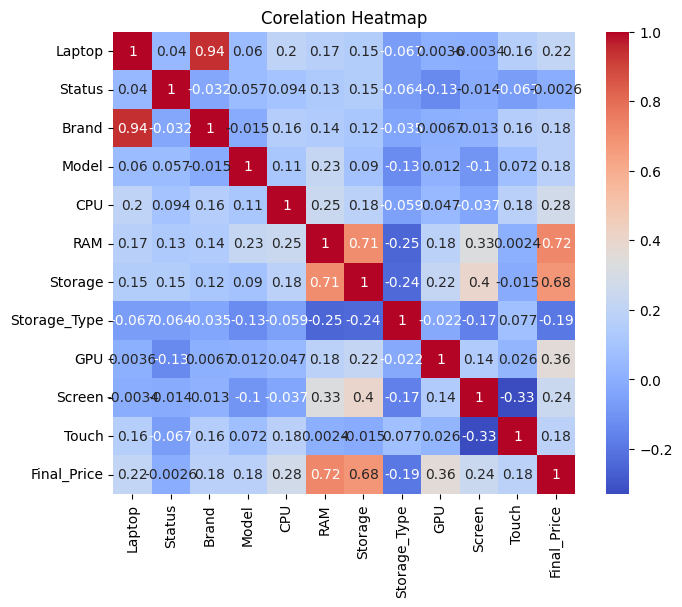

In [643]:
corr_mat= laptopdata.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', square=True)
plt.title('Corelation Heatmap')
plt.show()

## Data Modeling and Performance Evaluation

### Multiple Linear Regression

In [644]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.model_selection import cross_val_score

In [645]:
model_LG = LinearRegression(fit_intercept = True, n_jobs = 10, positive = True)
model_LG.fit(X_train, Y_train)

# Predicting the laptop prices on  the test data
Y_pred = model_LG.predict(X_test)


mse_LG = mean_squared_error(Y_test, Y_pred)
mae_LG = mean_absolute_error(Y_test, Y_pred)

## the squared option in mean squared error is by default True 
## if True then it is the MSE value and False is RMSE value
rmse_LG = mean_squared_error(Y_test, Y_pred, squared= False) 
r2_LG = r2_score(Y_test, Y_pred)
scores_LG = cross_val_score(model_LG, X, Y,scoring='r2', cv= 10)


print(" Mean Squared Error - ", mse_LG)
print(" Mean Absolute Error - ", mae_LG)
print(" Root mean sqaured error - ", rmse_LG)
print(" R2 score  - ", r2_LG)
print(" Cross Value Score - ", scores_LG)
print(" Mean R2 Score - ", scores_LG.mean())

 Mean Squared Error -  183399.9980381985
 Mean Absolute Error -  334.09166897805346
 Root mean sqaured error -  428.25225981680296
 R2 score  -  0.6414948559689346
 Cross Value Score -  [0.55529057 0.60897693 0.68186472 0.64584708 0.7594292  0.6393889
 0.60343736 0.60690153 0.52606963 0.55474694]
 Mean R2 Score -  0.6181952854851304


## Decision Tree Regressor

In [646]:
from sklearn.tree import DecisionTreeRegressor

In [647]:
model_DTR = DecisionTreeRegressor(max_depth = 9, criterion= "squared_error", splitter = "best", min_samples_split= 2)
model_DTR.fit(X_train, Y_train)


# Predicting the laptop prices on  the test data
Y_pred = model_DTR.predict(X_test)


mse_DTR = mean_squared_error(Y_test, Y_pred)
mae_DTR = mean_absolute_error(Y_test, Y_pred)

## the squared option in mean squared error is by default True 
## if True then it is the MSE value and False is RMSE value
rmse_DTR = mean_squared_error(Y_test, Y_pred, squared= False) 
r2_DTR = r2_score(Y_test, Y_pred)
scores_DTR = cross_val_score(model_DTR, X, Y,scoring='r2', cv = 10)


print(" Mean Squared Error - ", mse_DTR)
print(" Mean Absolute Error - ", mae_DTR)
print(" Root mean sqaured error - ", rmse_DTR)
print(" R2 score  - ", r2_DTR)
print(" Cross Value Score - ", scores_DTR)
print(" Mean R2 Score - ", scores_DTR.mean())

 Mean Squared Error -  106262.24759606205
 Mean Absolute Error -  223.7478762897416
 Root mean sqaured error -  325.9789066735178
 R2 score  -  0.7922815551418031
 Cross Value Score -  [0.86134803 0.78628667 0.84613254 0.79638132 0.84410876 0.79618075
 0.5835766  0.57386871 0.56278885 0.61113293]
 Mean R2 Score -  0.7261805145259936


## Random Forest Regressor

In [648]:
from sklearn.ensemble import RandomForestRegressor

In [649]:
model_RFR = RandomForestRegressor(n_estimators= 100, criterion='squared_error', max_depth= 9)

model_RFR.fit(X_train, Y_train)


# Predicting the laptop prices on  the test data
Y_pred = model_RFR.predict(X_test)


mse_RFR = mean_squared_error(Y_test, Y_pred)
mae_RFR = mean_absolute_error(Y_test, Y_pred)

## the squared option in mean squared error is by default True 
## if True then it is the MSE value and False is RMSE value
rmse_RFR = mean_squared_error(Y_test, Y_pred, squared= False) 
r2_RFR = r2_score(Y_test, Y_pred)
scores_RFR = cross_val_score(model_RFR, X, Y,scoring='r2', cv = 10)


print(" Mean Squared Error - ", mse_RFR)
print(" Mean Absolute Error - ", mae_RFR)
print(" Root mean sqaured error - ", rmse_RFR)
print(" R2 score  - ", r2_RFR)
print(" Cross Value Score - ", scores_RFR)
print(" Mean R2 Score - ", scores_RFR.mean())

 Mean Squared Error -  86479.82786792846
 Mean Absolute Error -  205.2429441552193
 Root mean sqaured error -  294.0745277441221
 R2 score  -  0.830951671334718
 Cross Value Score -  [0.87146742 0.84412501 0.87600017 0.83075975 0.90628694 0.79932034
 0.62779976 0.63272455 0.56390169 0.69431386]
 Mean R2 Score -  0.7646699473588798


## XGBoost Regressor

In [650]:
from xgboost import XGBRegressor

In [651]:
model_XGBR= XGBRegressor(random_state=0, enable_categorical=True, tree_method="hist" )
model_XGBR.fit(X_train, Y_train)


# Predicting the laptop prices on  the test data
Y_pred = model_XGBR.predict(X_test)


mse_XGBR = mean_squared_error(Y_test, Y_pred)
mae_XGBR = mean_absolute_error(Y_test, Y_pred)

## the squared option in mean squared error is by default True 
## if True then it is the MSE value and False is RMSE value
rmse_XGBR = mean_squared_error(Y_test, Y_pred, squared= False) 
r2_XGBR = r2_score(Y_test, Y_pred)
scores_XGBR = cross_val_score(model_XGBR, X, Y,scoring='r2', cv= 10)


print(" Mean Squared Error - ", mse_XGBR)
print(" Mean Absolute Error - ", mae_XGBR)
print(" Root mean sqaured error - ", rmse_XGBR)
print(" R2 score  - ", r2_XGBR)
print(" Cross Value Score - ", scores_XGBR)
print(" Mean R2 Score - ", scores_XGBR.mean())

 Mean Squared Error -  80591.06698202498
 Mean Absolute Error -  195.62501793943807
 Root mean sqaured error -  283.88565828872896
 R2 score  -  0.8424628550432677
 Cross Value Score -  [0.88763155 0.86186544 0.8924934  0.83307712 0.90247932 0.83048238
 0.70939592 0.72474467 0.5638843  0.68363571]
 Mean R2 Score -  0.7889689800120812


The lower value of **MAE**, **MSE**, and **RMSE** implies **higher accuracy** of a regression model. However, a higher value of R square is considered desirable (Chugh, 2020).

In [652]:
## preprocessing with standard scaling or standardization 

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)
X_train_std.shape, X_test_std.shape

((1512, 8), (648, 8))

### Applying some Unsupervised algorithm 

## PCA For Dimensionality Reduction

In [653]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Apply PCA
# pca = PCA(n_components=2)
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)

In [654]:
# import matplotlib.pyplot as plt

# # Plot the transformed data
# plt.figure(figsize=(8, 6))
# plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, cmap='viridis')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA of Laptop Dataset')
# plt.colorbar(label='Final Price')
# plt.show()

In [655]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [656]:
# km = KMeans(n_clusters= 5)
# km.fit_predict(X_train_std, Y_train)
# labels_kmeans = kmeans.labels_

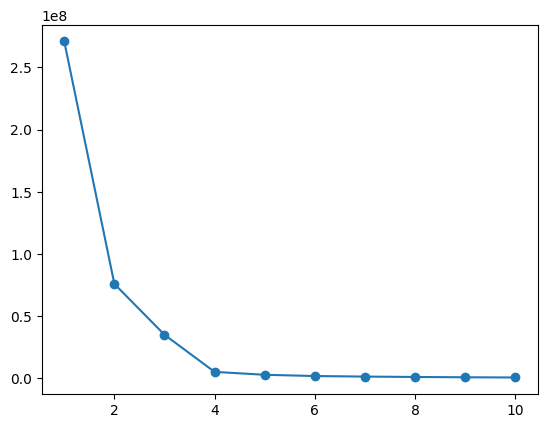

In [657]:
WCSS=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(X)
    WCSS.append(kmeans.inertia_)
    

plt.plot(range(1,11),WCSS,"-o")

In [658]:
km = KMeans(n_clusters= 10, max_iter= 500)
km.fit_predict(X_train_std, Y_train)
labels_kmeans = km.labels_

In [659]:
dbscan = DBSCAN(eps= 4, min_samples = 10 , metric='euclidean')
dbscan.fit_predict(X_train_std,Y_train)
labels_dbscan = dbscan.labels_

In [660]:
AGCluster = AgglomerativeClustering(n_clusters= 10,  metric='euclidean')
AGCluster.fit_predict(X_train_std, Y_train)
labels_AGCluster = AGCluster.labels_

In [661]:
# X_train_std.shape, labels_dbscan.shape, labels_kmeans.shape

In [662]:
from sklearn.metrics import silhouette_score

# Compute silhouette score for K-means
silhouette_score_kmeans = silhouette_score(X_train_std, labels_kmeans)

# Compute silhouette score for DBSCAN
silhouette_score_dbscan = silhouette_score(X_train_std, labels_dbscan)

silhouette_score_AGCluster = silhouette_score(X_train_std, labels_AGCluster)


print("Silhouette Score for K-means:", silhouette_score_kmeans)
print("Silhouette Score for DBSCAN:", silhouette_score_dbscan)
print("Silhouette Score for Hierarchial(Agglomerative):", silhouette_score_AGCluster)

Silhouette Score for K-means: 0.2914999508000796
Silhouette Score for DBSCAN: 0.5261989089875603
Silhouette Score for Hierarchial(Agglomerative): 0.26837708456014164


## Training The Neural Network

In [663]:
import tensorflow as tf
import keras

In [664]:
tf.__version__, keras.__version__

('2.6.0', '2.6.0')

In [665]:
# imrpoving the model
# making a larger model

# set random seed
tf.random.set_seed(42)

model_NN_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
    
            
])


# compile the model
model_NN_1.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
             metrics=['mae'])

# fit the model
model_NN_1.fit(X_train_std, Y_train, epochs = 250)

Epoch 1/250
48/48 [==============================] - 1s 5ms/step - loss: 1195.9272 - mae: 1195.9272
Epoch 2/250
48/48 [==============================] - 0s 6ms/step - loss: 653.4495 - mae: 653.4495
Epoch 3/250
48/48 [==============================] - 0s 5ms/step - loss: 337.8349 - mae: 337.8349
Epoch 4/250
48/48 [==============================] - 0s 5ms/step - loss: 319.5923 - mae: 319.5923
Epoch 5/250
48/48 [==============================] - 0s 5ms/step - loss: 312.4792 - mae: 312.4792
Epoch 6/250
48/48 [==============================] - 0s 4ms/step - loss: 306.0880 - mae: 306.0880
Epoch 7/250
48/48 [==============================] - 0s 5ms/step - loss: 302.5018 - mae: 302.5018
Epoch 8/250
48/48 [==============================] - 0s 4ms/step - loss: 299.4972 - mae: 299.4972
Epoch 9/250
48/48 [==============================] - 0s 5ms/step - loss: 298.2833 - mae: 298.2833
Epoch 10/250
48/48 [==============================] - 0s 4ms/step - loss: 294.2832 - mae: 294.2832
Epoch 11/250
48/4

48/48 [==============================] - 0s 4ms/step - loss: 187.7184 - mae: 187.7184
Epoch 166/250
48/48 [==============================] - 0s 5ms/step - loss: 188.2767 - mae: 188.2767
Epoch 167/250
48/48 [==============================] - 0s 4ms/step - loss: 184.8140 - mae: 184.8140
Epoch 168/250
48/48 [==============================] - 0s 3ms/step - loss: 188.7127 - mae: 188.7127
Epoch 169/250
48/48 [==============================] - 0s 4ms/step - loss: 189.7128 - mae: 189.7128
Epoch 170/250
48/48 [==============================] - 0s 4ms/step - loss: 185.4062 - mae: 185.4062
Epoch 171/250
48/48 [==============================] - 0s 3ms/step - loss: 182.9759 - mae: 182.9759
Epoch 172/250
48/48 [==============================] - 0s 4ms/step - loss: 184.0911 - mae: 184.0911
Epoch 173/250
48/48 [==============================] - 0s 4ms/step - loss: 184.1915 - mae: 184.1915
Epoch 174/250
48/48 [==============================] - 0s 4ms/step - loss: 182.5164 - mae: 182.5164
Epoch 175/250


48/48 [==============================] - 0s 4ms/step - loss: 179.5743 - mae: 179.5743
Epoch 248/250
48/48 [==============================] - 0s 4ms/step - loss: 175.0140 - mae: 175.0140
Epoch 249/250
48/48 [==============================] - 0s 4ms/step - loss: 178.5231 - mae: 178.5231
Epoch 250/250
48/48 [==============================] - 0s 4ms/step - loss: 178.6251 - mae: 178.6251


In [666]:
Y_pred = model_NN_1.predict(X_test_std)
# Y_pred

In [667]:
mse_NN_1 = mean_squared_error(Y_test, Y_pred)
mae_NN_1 = mean_absolute_error(Y_test, Y_pred)

## the squared option in mean squared error is by default True 
## if True then it is the MSE value and False is RMSE value
rmse_NN_1 = mean_squared_error(Y_test, Y_pred, squared= False) 
r2_NN_1 = r2_score(Y_test, Y_pred)



print(" Mean Squared Error - ", mse_NN_1)
print(" Mean Absolute Error - ", mae_NN_1)
print(" Root mean sqaured error - ", rmse_NN_1)
print(" R2 score  - ", r2_NN_1)



 Mean Squared Error -  98737.61973761217
 Mean Absolute Error -  216.93492920298632
 Root mean sqaured error -  314.225428216133
 R2 score  -  0.8069904854745715


In [668]:
# imrpoving the model
# making a larger model

# set random seed
tf.random.set_seed(42)

model_NN_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
    
            
])


# compile the model
model_NN_2.compile(loss = tf.keras.losses.mse,
             optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
             metrics=['mse'])

# fit the model
model_NN_2.fit(X_train_std, Y_train, epochs = 250)

Epoch 1/250
48/48 [==============================] - 1s 5ms/step - loss: 1924743.5000 - mse: 1924743.5000
Epoch 2/250
48/48 [==============================] - 0s 4ms/step - loss: 695042.8125 - mse: 695042.8125
Epoch 3/250
48/48 [==============================] - 0s 3ms/step - loss: 205256.7969 - mse: 205256.7969
Epoch 4/250
48/48 [==============================] - 0s 4ms/step - loss: 184326.3750 - mse: 184326.3750
Epoch 5/250
48/48 [==============================] - 0s 4ms/step - loss: 175801.4688 - mse: 175801.4688
Epoch 6/250
48/48 [==============================] - 0s 4ms/step - loss: 170508.2812 - mse: 170508.2812
Epoch 7/250
48/48 [==============================] - 0s 4ms/step - loss: 167218.1094 - mse: 167218.1094
Epoch 8/250
48/48 [==============================] - 0s 4ms/step - loss: 164253.0469 - mse: 164253.0469
Epoch 9/250
48/48 [==============================] - 0s 4ms/step - loss: 164541.5625 - mse: 164541.5625
Epoch 10/250
48/48 [==============================] - 0s 4ms/s

48/48 [==============================] - 0s 7ms/step - loss: 73015.5312 - mse: 73015.5312
Epoch 159/250
48/48 [==============================] - 0s 8ms/step - loss: 74237.4766 - mse: 74237.4766
Epoch 160/250
48/48 [==============================] - 0s 6ms/step - loss: 73302.1250 - mse: 73302.1250
Epoch 161/250
48/48 [==============================] - 0s 6ms/step - loss: 73212.0156 - mse: 73212.0156
Epoch 162/250
48/48 [==============================] - 0s 7ms/step - loss: 70006.3203 - mse: 70006.3203
Epoch 163/250
48/48 [==============================] - 0s 6ms/step - loss: 71046.0703 - mse: 71046.0703
Epoch 164/250
48/48 [==============================] - 0s 9ms/step - loss: 75438.3516 - mse: 75438.3516
Epoch 165/250
48/48 [==============================] - 0s 6ms/step - loss: 69996.6250 - mse: 69996.6250
Epoch 166/250
48/48 [==============================] - 0s 8ms/step - loss: 72503.0859 - mse: 72503.0859
Epoch 167/250
48/48 [==============================] - 0s 7ms/step - loss: 687

In [669]:
Y_pred = model_NN_2.predict(X_test_std)
# Y_pred


mse_NN_2 = mean_squared_error(Y_test, Y_pred)
mae_NN_2 = mean_absolute_error(Y_test, Y_pred)

## the squared option in mean squared error is by default True 
## if True then it is the MSE value and False is RMSE value
rmse_NN_2 = mean_squared_error(Y_test, Y_pred, squared= False) 
r2_NN_2 = r2_score(Y_test, Y_pred)



print(" Mean Squared Error - ", mse_NN_2)
print(" Mean Absolute Error - ", mae_NN_2)
print(" Root mean sqaured error - ", rmse_NN_2)
print(" R2 score  - ", r2_NN_2)


 Mean Squared Error -  93767.02806106117
 Mean Absolute Error -  216.34333504441344
 Root mean sqaured error -  306.214023292633
 R2 score  -  0.8167068579063226


### Comparison between Machine Learning models result

In [670]:
MSE = [mse_LG, mse_DTR, mse_RFR, mse_XGBR]

model_names = ["Linear Regression",  "Decision Tree", "Random Forest", "XGBRegressor"]

print(" Mean Squared Error Result of Every Machine Learning Regression models ".center(120,"*"))
print()                                                                      
for name, mse  in zip(model_names, MSE):
    print(name + " - "+ str(mse) + "\n")
    
print()

MAE = [mae_LG, mae_DTR, mae_RFR, mae_XGBR]

model_names = ["Linear Regression", "Decision Tree", "Random Forest", "XGBRegressor"]

print(" Mean Absolute Error Result of Every Machine Learning Regression models ".center(120,"*"))
print()                                                                    
for name, mae  in zip(model_names, MAE):
    print(name + " - "+ str(mae) + "\n")
    
print()

RMSE = [rmse_LG, rmse_DTR, rmse_RFR, rmse_XGBR]

model_names = ["Linear Regression", "Decision Tree", "Random Forest", "XGBRegressor"]

print(" Root Mean Squared Error Result of Every Machine Learning Regression models ".center(120,"*"))
print()                                                                      
for name, rmse  in zip(model_names, RMSE):
    print(name + " - "+ str(rmse) + "\n")
    
print()

R2_score = [r2_LG, r2_DTR, r2_RFR, r2_XGBR]

model_names = ["Linear Regression", "Decision Tree", "Random Forest", "XGBRegressor"]

print(" R2 Score Result of Every Machine Learning Regression models ".center(120,"*"))
print()                                                                      
for name, r2_scores  in zip(model_names, R2_score):
    print(name + " - "+ str(r2_scores) + "\n")
    


    

************************ Mean Squared Error Result of Every Machine Learning Regression models *************************

Linear Regression - 183399.9980381985

Decision Tree - 106262.24759606205

Random Forest - 86479.82786792846

XGBRegressor - 80591.06698202498


************************ Mean Absolute Error Result of Every Machine Learning Regression models ************************

Linear Regression - 334.09166897805346

Decision Tree - 223.7478762897416

Random Forest - 205.2429441552193

XGBRegressor - 195.62501793943807


********************** Root Mean Squared Error Result of Every Machine Learning Regression models **********************

Linear Regression - 428.25225981680296

Decision Tree - 325.9789066735178

Random Forest - 294.0745277441221

XGBRegressor - 283.88565828872896


***************************** R2 Score Result of Every Machine Learning Regression models ******************************

Linear Regression - 0.6414948559689346

Decision Tree - 0.7922815551418031


### Comparison of Results between Two Neural Network Models

In [671]:
MSE = [mse_NN_1, mse_NN_2]

model_names = ["NeuralModel_1", "NeuralModel_2"]

print(" Mean Squared Error Result of Neural Network Models ".center(120,"*"))
print()                                                                      
for name, mse  in zip(model_names, MSE):
    print(name + " - "+ str(mse) + "\n")
    
    
    
MAE = [mae_NN_1, mae_NN_2]

model_names = ["NeuralModel_1", "NeuralModel_2"]

print(" Mean Absolute Error Result of Neural Network Models ".center(120,"*"))
print()                                                                    
for name, mae  in zip(model_names, MAE):
    print(name + " - "+ str(mae) + "\n")
    
    
RMSE = [rmse_NN_1, rmse_NN_2]

model_names = ["NeuralModel_1", "NeuralModel_2"]

print(" Root Mean Squared Error Result of Neural Netwrok Models ".center(120,"*"))
print()                                                                      
for name, rmse  in zip(model_names, RMSE):
    print(name + " - "+ str(rmse) + "\n")
    
R2_score = [r2_NN_1, r2_NN_2]

model_names = ["NeuralModel_1", "NeuralModel_2"]

print(" R2 Score Result of Deep Learning Models ".center(120,"*"))
print()                                                                      
for name, r2_scores  in zip(model_names, R2_score):
    print(name + " - "+ str(r2_scores) + "\n")
    

********************************** Mean Squared Error Result of Neural Network Models **********************************

NeuralModel_1 - 98737.61973761217

NeuralModel_2 - 93767.02806106117

********************************* Mean Absolute Error Result of Neural Network Models **********************************

NeuralModel_1 - 216.93492920298632

NeuralModel_2 - 216.34333504441344

******************************* Root Mean Squared Error Result of Neural Netwrok Models ********************************

NeuralModel_1 - 314.225428216133

NeuralModel_2 - 306.214023292633

*************************************** R2 Score Result of Deep Learning Models ****************************************

NeuralModel_1 - 0.8069904854745715

NeuralModel_2 - 0.8167068579063226



On the above piece of output- 

* For the **NeuralModel_1**, I have taken the **loss** as **MAE** and **metric** as **MAE** 

* For the **NeuralModel_2** I have taken the **loss** as **MSE** and **metric** as **MSE** as well. 

In [672]:
# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=10),
    "Random Forest": RandomForestRegressor(n_estimators=10),
    "XGBRegressor": XGBRegressor(random_state=0, enable_categorical=True, tree_method="hist")
}

# Perform cross-validation and evaluate each model
for model_name, model in models.items():
    scores = cross_val_score(model, X, Y, scoring='r2', cv=10)  # 10-fold cross-validation
    print(f"{model_name} - R2 scores: {scores}")
    print(f"Mean R2 score: {scores.mean()}")
    print()

Linear Regression - R2 scores: [0.55549429 0.6091182  0.68093351 0.6453689  0.75882727 0.63968753
 0.6037041  0.60722569 0.52642128 0.55502193]
Mean R2 score: 0.6181802697396425

Decision Tree - R2 scores: [0.85195506 0.79424426 0.83920536 0.8005652  0.8449903  0.79645804
 0.57406198 0.56022503 0.55069972 0.59992182]
Mean R2 score: 0.7212326770106378

Random Forest - R2 scores: [0.89427506 0.80496884 0.87378749 0.81230007 0.89254917 0.80334771
 0.66948123 0.66038518 0.5914576  0.67921128]
Mean R2 score: 0.7681763628482979

XGBRegressor - R2 scores: [0.88763155 0.86186544 0.8924934  0.83307712 0.90247932 0.83048238
 0.70939592 0.72474467 0.5638843  0.68363571]
Mean R2 score: 0.7889689800120812



The lower value of **MAE**, **MSE**, and **RMSE** implies **higher accuracy** of a regression model. However, a higher value of **R square** is considered desirable (Chugh, 2020).

## Reference - 



Base, K. (2022) <I>Pandas: How to replace Zero values in a column with the mean of that column, For all colum.</I> Youtube. Available at: https://www.youtube.com/watch?v=QC824X6LoxU (Accessed: 9 February 2024).
                
Chugh, A. (2020) <I>MAE, MSE, RMSE, coefficient of determination, adjusted R squared — which metric is better?, Analytics Vidhya.</I> Available at: https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e (Accessed: 13 February 2024).

Tamboli, N. (2021) <I>Effective strategies for handling missing values in data analysis (updated 2023), Analytics Vidhya.</I> Available at: https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/ (Accessed: 9 February 2024).

Zafar, A. (2022) <I>Handling outliers in Pandas - Arsalan Zafar, Medium.</I> Available at: https://medium.com/@arsalan_zafar/handling-outliers-in-pandas-5cd872eef508 (Accessed: 10 February 2024).
